<a href="https://colab.research.google.com/github/elhamnadimi/social-network-analysis-proj/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
load('/content/CISPRINWOSmatrices.RData')

In [ ]:
load('/content/CISPRINWOS_attributes.RData')

In [ ]:
ls(PRIN)

[1] "AUTHOR"     "Citations"  "Code"       "H.Index"    "NumDocs"   
[6] "References" "Sector"

In [ ]:
install.packages("igraphdata")
install.packages("igraph")
install.packages("network")
install.packages("statnet")
install.packages("intergraph")
install.packages("dplyr")
install.packages("stringr")
install.packages("RColorBrewer")
install.packages("sand")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("igraphdata")
library("igraph")
library("network")
library("statnet")
library("intergraph")
library("dplyr")
library("stringr")
library("RColorBrewer")
library("sand")



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


network: Classes for Relational Data
Version 1.16.0 created on 2019-11-30.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribut

In [ ]:
nodePRIN <- data.frame(PRIN)
#nodePRIN
relationsp <- as.matrix(PrinFull)

PRIN_graph = graph_from_adjacency_matrix(relationsp, mode="undirected",weighted = TRUE)
PRIN_graph


IGRAPH 4040541 UNW- 2839 9379 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 4040541 (vertex names):
 [1] S0001--A0093 S0001--S0067 S0001--S0074 S0001--A0601 S0001--A0732
 [6] S0001--A0836 S0001--A1064 S0001--A1105 S0001--A1109 S0001--S0462
[11] S0001--S0463 S0001--S0467 S0001--S0533 S0001--S0584 S0001--A1693
[16] S0001--A1695 S0001--A2007 A0001--S0009 A0001--A0027 A0001--A0113
[21] A0001--A0274 A0001--A0353 A0001--A0598 A0001--A0777 A0001--A0930
[26] A0001--A0957 A0001--S0353 A0001--A1369 A0001--A1594 A0001--A2052
[31] A0001--A2122 A0001--S0790 A0002--S0071 A0002--A0217 A0002--S0319
[36] A0002--A0965 A0002--A1229 A0002--S0479 A0002--A1653 A0002--A1805
+ ... omitted several edges

In [ ]:
allcodes_vec <- as.vector(V(PRIN_graph)$name)#vector of all names of nodes in the PrinFull
External_authors<-str_subset(allcodes_vec, "A")
#External_authors
#Also we subset all codes that start from S-Italian authors from matrix with all names of nodes in the CISFull and save them as InternalCodes
InternalCodes<-str_subset(allcodes_vec, "S")
#InternalCodes

#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodePRIN$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors

In [ ]:
#Here we found what authors are representes in both tables CIS and CISFull and we will assign to them all given attributes.
Italiancodes_vec <- as.vector(nodePRIN$Code)#choose all codes from CIS dataframe-table of Italian statisticians.
Italian_authors <- intersect(InternalCodes,Italiancodes_vec)#intersection of Italian authors code from the previous table with the full matrix of egdes between codes. 
#Italian_authors
#Here we found what authors are presented in relationship table CISFull, but not in attributes table CIS with codes similar to Italian statistitians, starting from S.
Unknown_italian_authors <- setdiff(InternalCodes,Italiancodes_vec)
#Unknown_italian_authors

In [ ]:
#Set of nodes attributes - Author names
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- as.character(nodePRIN$AUTHOR)
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% External_authors]) <- "External"
vertex_attr(PRIN_graph, "Author",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Unknown_italian_authors]) <- "Unknown"
#Set other attributes
vertex_attr(PRIN_graph, "Sector",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- as.character(nodePRIN$Sector)
vertex_attr(PRIN_graph, "H.Index",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$H.Index
vertex_attr(PRIN_graph, "NumDocs",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$NumDocs
vertex_attr(PRIN_graph, "References",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$References
vertex_attr(PRIN_graph, "Citations",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% Italian_authors]) <- nodePRIN$Citations
#set additional attribute type of authors-foreign/italian for futher plotting
vertex_attr(PRIN_graph, "Author.Type",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% InternalCodes]) <- "Italian_researchers"
vertex_attr(PRIN_graph, "Author.Type",index=V(PRIN_graph)$name[V(PRIN_graph)$name %in% External_authors]) <- "Foreign_researchers"

vertex.attributes(PRIN_graph)
summary(PRIN_graph)


$name
   [1] "S0001" "A0001" "A0002" "A0003" "A0004" "A0005" "A0006" "A0007" "A0008"
  [10] "S0003" "A0009" "A0010" "A0011" "S0004" "S0005" "A0012" "A0013" "A0014"
  [19] "A0015" "A0016" "A0017" "A0018" "A0019" "A0020" "A0021" "A0022" "A0023"
  [28] "A0024" "A0025" "A0026" "S0008" "S0009" "A0027" "A0028" "S0010" "A0029"
  [37] "A0030" "A0031" "S0011" "A0032" "A0033" "A0034" "A0035" "A0036" "S0014"
  [46] "A0037" "S0015" "A0038" "A0039" "A0040" "A0041" "A0042" "A0043" "A0044"
  [55] "A0045" "A0046" "A0047" "A0048" "S0016" "A0049" "S0018" "A0050" "A0051"
  [64] "A0052" "A0053" "A0054" "A0055" "A0056" "A0057" "A0058" "A0059" "S0021"
  [73] "A0060" "A0061" "S0022" "S0023" "A0062" "A0063" "A0064" "A0065" "S0025"
  [82] "A0066" "S0026" "A0067" "S0027" "A0068" "A0069" "A0070" "A0071" "A0072"
  [91] "A0073" "A0074" "A0075" "S0029" "A0076" "A0077" "A0078" "A0079" "A0080"
 [100] "A0081" "S0031" "S0032" "A0082" "A0083" "S0033" "A0084" "A0085" "A0086"
 [109] "A0087" "S0034" "A0088" "A0089" "A0090" "A0091" "A0092" "A0093" "S0035"
 [118] "A0094" "A0095" "A0096" "S0036" "A0097" "A0098" "A0099" "A0100" "A0101"
 [127] "A0102" "A0103" "A0104" "A0105" "A0106" "S0038" "A0107" "A0108" "S0039"
 [136] "S0040" "A0109" "A0110" "A0111" "A0112" "A0113" "A0114" "A0115" "S0041"
 [145] "A0116" "S0042" "A0117" "A0118" "A0119" "A0120" "A0121" "A0122" "A0123"
 [154] "S0044" "A0124" "A0125" "A0126" "A0127" "A0128" "A0129" "A0130" "A0131"
 [163] "S0045" "A0132" "A0133" "S0047" "A0134" "A0135" "A0136" "S0048" "A0137"
 [172] "S0049" "A0138" "S0050" "A0139" "S0051" "A0140" "A0141" "S0052" "A0142"
 [181] "A0143" "A0144" "A0145" "A0146" "A0147" "A0148" "A0149" "A0150" "A0151"
 [190] "S0053" "A0152" "A0153" "A0154" "A0155" "A0156" "A0157" "S0055" "A0158"
 [199] "S0056" "A0159" "A0160" "A0161" "A0162" "A0163" "S0057" "A0164" "A0165"
 [208] "A0166" "A0167" "A0168" "A0169" "A0170" "A0171" "A0172" "A0173" "A0174"
 [217] "A0175" "A0176" "S0059" "A0177" "S0060" "A0178" "S0061" "S0062" "S0063"
 [226] "A0179" "A0180" "A0181" "A0182" "A0183" "S0065" "S0066" "A0184" "A0185"
 [235] "A0186" "A0187" "A0188" "A0189" "A0190" "S0067" "A0191" "A0192" "A0193"
 [244] "A0194" "A0195" "A0196" "A0197" "A0198" "A0199" "S0069" "A0200" "A0201"
 [253] "A0202" "A0203" "S0070" "A0204" "A0205" "S0071" "S0072" "S0074" "A0206"
 [262] "A0207" "S0075" "S0076" "S0077" "A0208" "A0209" "A0210" "A0211" "A0212"
 [271] "A0213" "A0214" "A0215" "A0216" "S0078" "A0217" "A0218" "A0219" "A0220"
 [280] "A0221" "A0222" "A0223" "A0224" "S0080" "S0081" "A0225" "A0226" "A0227"
 [289] "A0228" "S0082" "S0084" "A0229" "A0230" "S0085" "A0231" "A0232" "A0233"
 [298] "A0234" "A0235" "S0087" "A0236" "S0088" "A0237" "A0238" "S0089" "A0239"
 [307] "A0240" "A0241" "A0242" "A0243" "A0244" "A0245" "A0246" "A0247" "A0248"
 [316] "A0249" "S0092" "A0250" "A0251" "A0252" "A0253" "A0254" "S0093" "S0094"
 [325] "S0095" "A0255" "S0096" "A0256" "A0257" "A0258" "A0259" "A0260" "A0261"
 [334] "A0262" "A0263" "A0264" "A0265" "S0097" "A0266" "S0098" "S0099" "A0267"
 [343] "A0268" "A0269" "A0270" "S0101" "A0271" "A0272" "S0102" "A0273" "A0274"
 [352] "A0275" "S0103" "S0104" "A0276" "S0105" "A0277" "A0278" "A0279" "A0280"
 [361] "A0281" "A0282" "S0107" "A0283" "A0284" "A0285" "A0286" "A0287" "A0288"
 [370] "A0289" "S0108" "A0290" "S0109" "A0291" "A0292" "A0293" "A0294" "A0295"
 [379] "A0296" "A0297" "A0298" "A0299" "A0300" "A0301" "A0302" "A0303" "A0304"
 [388] "A0305" "A0306" "A0307" "A0308" "A0309" "A0310" "A0311" "A0312" "A0313"
 [397] "A0314" "S0114" "A0315" "S0115" "A0316" "A0317" "S0116" "A0318" "S0117"
 [406] "A0319" "A0320" "S0118" "A0321" "A0322" "A0323" "A0324" "S0120" "S0121"
 [415] "A0325" "A0326" "A0327" "A0328" "A0329" "A0330" "A0331" "S0122" "A0332"
 [424] "A0333" "A0334" "S0123" "S0124" "A0335" "A0336" "A0337" "A0338" "A0339"
 [433] "A0340" "S0125" "A0341" "S0127" "A0342" "A0343" "A0344" "A0345" "A0346"
 [442] "S0128" "S0129" "A0347" "A0348" "A0349" "A0350" "A0351" "A0352" "A0353"
 [451] "A0354" "A0355" "A0356" "A0357" "A035

IGRAPH 4040541 UNW- 2839 9379 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)


In [ ]:
vertex_attr_names(PRIN_graph)


[1] "name"        "Author"      "Sector"      "H.Index"     "NumDocs"    
[6] "References"  "Citations"   "Author.Type"

In [ ]:
#transforming from Igraph to Network
PRIN_NET<-asNetwork(PRIN_graph)
PRIN_NET

 Network attributes:
  vertices = 2839 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 9379 
    missing edges= 0 
    non-missing edges= 9379 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names not shown 

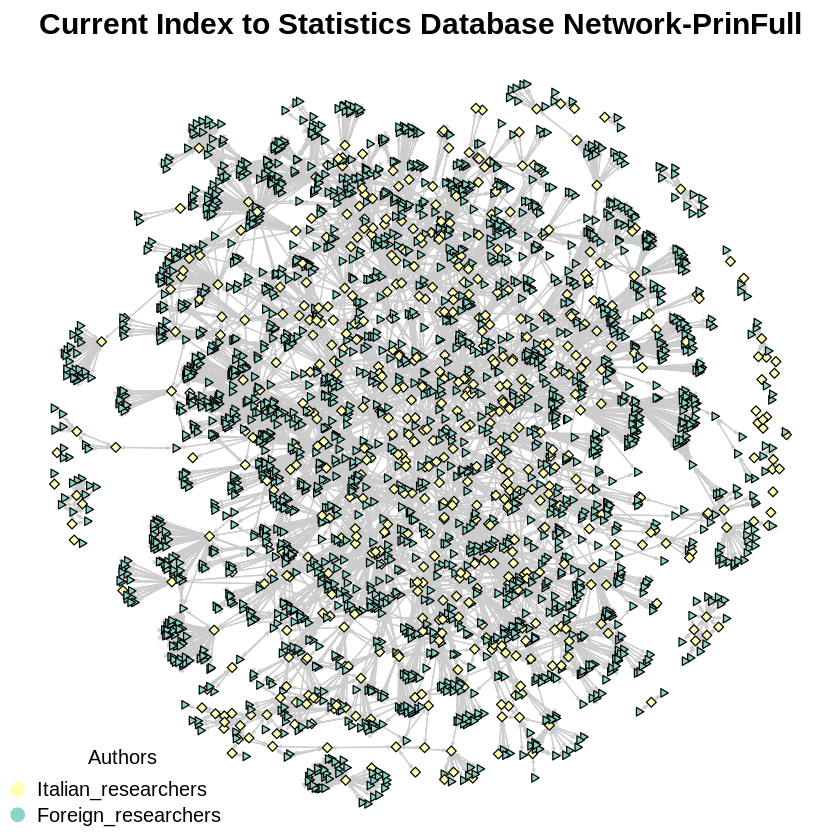

In [ ]:
#visualizing the Large network and as we can see the contrality is not in the center of graph.
my_pal <- brewer.pal(11,"Set3")
rolecat <- as.factor(get.vertex.attribute(PRIN_NET,"Author.Type"))
par(mar=c(0,0,2,0))


sidenum <- 3:7
gplot(PRIN_NET,vertex.cex=2.4,
      edge.col="grey80",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE,
      vertex.sides=sidenum[rolecat]
     ,cex.main=1.5,layout.fruchterman.reingold,
      vertex.col=my_pal[rolecat],main="Current Index to Statistics Database Network-PrinFull")

legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")


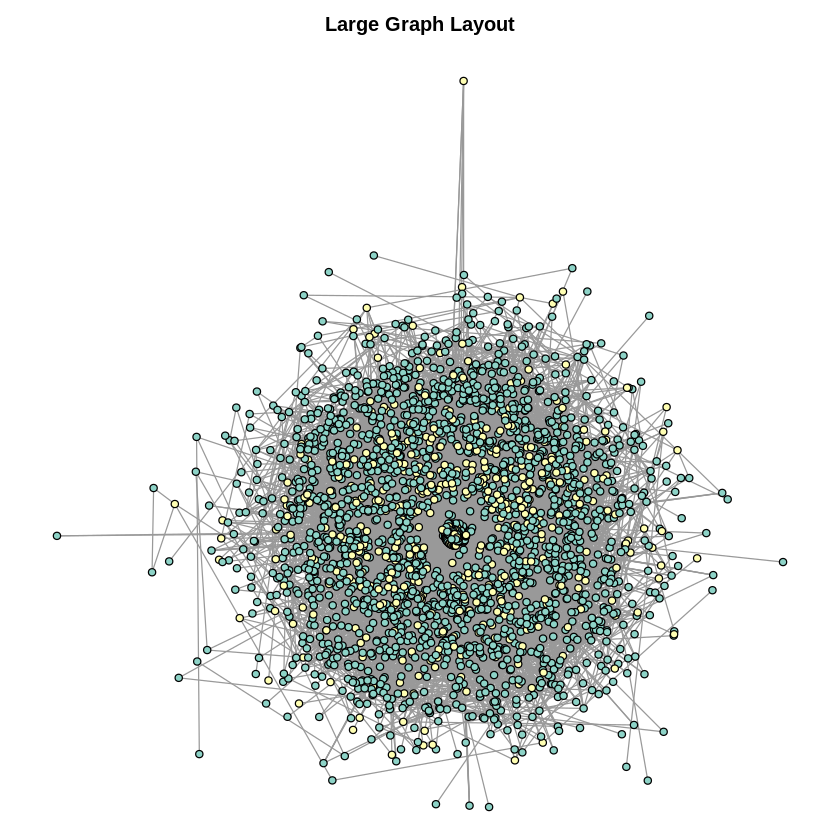

In [ ]:
my_pal <- brewer.pal(11,"Set3")

rolecat <- as.factor(get.vertex.attribute(PRIN_NET,"Author.Type"))
#anather way of plotting
par(mar=c(0,0,2,0))
#deg <- degree(PRIN_NET,rescale=TRUE)
#V(PRIN_graph)$size <- deg*1500
V(PRIN_graph)$color <-my_pal[rolecat]
l=layout.kamada.kawai(PRIN_graph)
plot(PRIN_graph,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,layout=l,vertex.size=2)
  title(main="Large Graph Layout", cex.main=1)

In [ ]:
table(degree(PRIN_NET,gmode="graph"))


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
  7 359 549 378 236 197 142 168 102 113  73  73  85  32  54  33  11  38  29  19 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  39  41 
  7   5   8   3   9  15   2  13  16  12   8   7   1   5   2   1   3   1   3   2 
 43  44  45  46  47  48  51  54  56  58  64  69 116 122 
  1   2   1   1   1   1   1   3   2   1   1   1   1   1 

In [ ]:


  # HighDeg 

vertex.attributes(HighDeg)

$name
[1] "S0071" "S0314" "A1820" "A1973" "A2078" "S0768" "S0790"

$Author
[1] "BIGGERI A"  "GERZELI S"  "External"   "External"   "External"  
[6] "VIGOTTI MA" "ZIRILLI A" 

$Sector
[1] "SECS-S/02" "SECS-S/05" NA          NA          NA          "SECS-S/02"
[7] "SECS-S/02"

$H.Index
[1] 28  8 NA NA NA  7  6

$NumDocs
[1] 182  18  NA  NA  NA  35  13

$References
[1] 2338  521   NA   NA   NA  324  349

$Citations
[1] 2564  284   NA   NA   NA  340   89

$Author.Type
[1] "Italian_researchers" "Italian_researchers" "Foreign_researchers"
[4] "Foreign_researchers" "Foreign_researchers" "Italian_researchers"
[7] "Italian_researchers"

$nodedegree
[1] 116  64  56  56  58 122  69

$size
[1] 23.2 12.8 11.2 11.2 11.6 24.4 13.8

In [ ]:
install.packages("ggplot2")
install.packages("stringr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(stringr)
library(ggplot2)

S0768 S0071 S0790 S0314 A2078 A1973 A1820 
  122   116    69    64    58    56    56

[1] "BIGGERI A"  "GERZELI S"  "External"   "External"   "External"  
[6] "VIGOTTI MA" "ZIRILLI A"

            
             SECS-S/02 SECS-S/05
  BIGGERI A          1         0
  External           0         0
  GERZELI S          0         1
  VIGOTTI MA         1         0
  ZIRILLI A          1         0

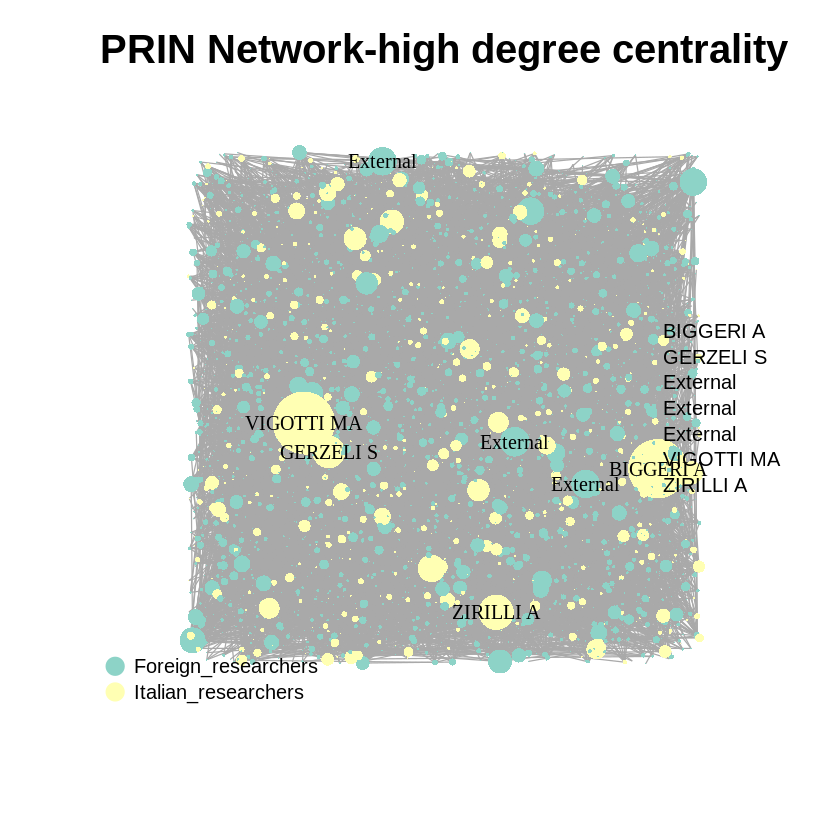

In [ ]:
my_pal <- brewer.pal(11,"Set3")
rolecat <- my_pal[as.numeric(as.factor(V(PRIN_graph)$Author.Type))]


#anather way of visulizing , finding the most high degree node in big graph.
CIS_CI<- igraph::degree(PRIN_graph)
sorted<-sort(CIS_CI, decreasing = FALSE)
max_citation<-sorted[c(2839,2838,2837,2836,2835,2834,2833)] 
max_citation

V(PRIN_graph)$Author[CIS_CI %in% max_citation]#authors that have the most CITATIONS

#IN WHICH SECTOR DO AUTHORS WITH HIGH CITATION BELONG? they are mostly belong to sector 1.
table(V(PRIN_graph)$Author[CIS_CI %in% max_citation],V(PRIN_graph)$Sector[CIS_CI%in% max_citation])


#Plot the graph with node size equal to node degree
V(PRIN_graph)$size <- CIS_CI*0.2
plot(PRIN_graph,layout=layout.random,
vertex.frame.color=NA,vertex.label.color="black",
vertex.color= rolecat,vertex.label = ifelse(CIS_CI %in% max_citation ,
V(PRIN_graph)$Author, NA),vertex.label.dist=0)

legend("bottomleft", legend=levels(as.factor(V(PRIN_graph)$Author.Type)),
col = my_pal, bty = 'n', pch=20 , pt.cex = 3, cex = 1, text.col='black' ,
 horiz = FALSE)

legend("right", legend=as.character(V(PRIN_graph)$Author[CIS_CI %in% max_citation]), 
bty = 'n', pch=NA_integer_ , pt.cex = 6, cex = 1, text.col='black' , 
horiz = FALSE)

title(main="PRIN Network-high degree centrality", cex.main=2)



In [ ]:
#This vertix has the most highest degree with degree 122
y <- get.inducedSubgraph(PRIN_NET,
                         which(degree(PRIN_NET,gmode="graph")== "122"))
Y2<-asIgraph(y)                         
vertex.attributes(Y2)

$Author
[1] "VIGOTTI MA"

$Author.Type
[1] "Italian_researchers"

$Citations
[1] 340

$H.Index
[1] 7

$na
[1] FALSE

$NumDocs
[1] 35

$References
[1] 324

$Sector
[1] "SECS-S/02"

$vertex.names
[1] "S0768"

In [ ]:
library(stringr)
library(ggplot2)

In [ ]:
install.packages("stringr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ci<- sort(unique(V(PRIN_graph)$Citations))
ci
c<-sort(table(V(PRIN_graph)$Citations))


[1]    0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
 [16]   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29
 [31]   30   31   32   33   34   35   36   37   38   39   40   41   42   43   45
 [46]   46   47   48   49   50   51   52   53   55   56   57   58   59   60   64
 [61]   65   66   67   68   70   71   74   75   76   77   78   80   81   82   83
 [76]   84   86   87   88   89   94   95   96   98   99  100  102  103  104  108
 [91]  109  115  116  117  125  129  131  132  136  140  146  148  151  154  163
[106]  166  169  172  179  181  186  195  198  207  209  212  218  231  245  264
[121]  268  272  277  284  299  305  310  314  326  333  340  353  386  428  448
[136]  561  755  804 1039 1143 1260 2564

In [ ]:
ci<- sort(unique(V(PRIN_graph)$Citations))
#ci
#c<-sort(table(V(PRIN_graph)$Citations))
high_cit<-ci[119:142] #most citation that I used to plot in the next code.
V(PRIN_graph)$Author[ci %in% high_cit]#authors that have the most CITATIONS

#IN WHICH SECTOR DO AUTHORS WITH HIGH CITATION BELONG? they are mostly belong to sector 1.
table(V(PRIN_graph)$Author[ci %in% high_cit],V(PRIN_graph)$Sector[ci%in% high_cit])



[1] "External"             "External"             "BALDI ANTOGNINI A"   
  [4] "External"             "External"             "External"            
  [7] "External"             "External"             "External"            
 [10] "External"             "External"             "External"            
 [13] "External"             "BALZANO S"            "External"            
 [16] "External"             "BARABESI L"           "BARAGONA R"          
 [19] "External"             "External"             "External"            
 [22] "External"             "External"             "External"            
 [25] "External"             "External"             "BINI M"              
 [28] "BIRINDELLI AM"        "BISAGLIA L"           "External"            
 [31] "External"             "External"             "External"            
 [34] "External"             "External"             "External"            
 [37] "External"             "External"             "BLANGIARDO GC"       
 [40] "External"             "External"             "External"            
 [43] "External"             "External"             "External"            
 [46] "External"             "External"             "BOCCI L"             
 [49] "Unknown"              "External"             "CABRAS S"            
 [52] "External"             "External"             "Unknown"             
 [55] "External"             "External"             "External"            
 [58] "External"             "CAGIANO DE AZEVEDO R" "CAGNONE S"           
 [61] "External"             "External"             "External"            
 [64] "External"             "External"             "External"            
 [67] "External"             "CALIA P"              "External"            
 [70] "External"             "External"             "CALO DG"             
 [73] "Unknown"              "External"             "CERIOLI A"           
 [76] "External"             "External"             "External"            
 [79] "External"             "External"             "External"            
 [82] "External"             "External"             "External"            
 [85] "External"             "External"             "External"            
 [88] "External"             "External"             "External"            
 [91] "CHELI B"              "External"             "External"            
 [94] "External"             "External"             "External"            
 [97] "External"             "External"             "External"            
[100] "COSTA M"              "External"             "External"            
[103] "Unknown"              "External"             "External"            
[106] "External"             "External"             "External"            
[109] "External"             "External"             "External"            
[112] "External"             "External"             "External"            
[115] "External"             "CRIPPA F"             "CRISAFULLI C"        
[118] "External"             "External"             "External"            
[121] "External"             "External"             "External"            
[124] "External"             "External"             "External"            
[127] "External"             "External"             "External"            
[130] "External"             "D ESPOSITO MR"        "External"            
[133] "External"             "DI BATTISTA T"        "External"            
[136] "External"             "DI CIACCIO A"         "DI COMITE L"         
[139] "External"             "External"             "Unknown"             
[142] "External"             "External"             "External"            
[145] "External"             "External"             "External"            
[148] "External"             "External"             "External"            
[151] "External"             "External"             "External"            
[154] "External"             "External"             "External"            
[157] "FERRANTE MR"          "External"             "FERRARI G"           
[160] "FERRARI PA"         

                      
                       SECS-S/01 SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05
  BALDI ANTOGNINI A            1         0         0         0         0
  BALZANO S                    1         0         0         0         0
  BARABESI L                   1         0         0         0         0
  BARAGONA R                   1         0         0         0         0
  BINI M                       0         0         1         0         0
  BIRINDELLI AM                0         0         0         1         0
  BISAGLIA L                   0         0         1         0         0
  BLANGIARDO GC                0         0         0         1         0
  BOCCI L                      1         0         0         0         0
  CABRAS S                     1         0         0         0         0
  CAGIANO DE AZEVEDO R         0         0         0         1         0
  CAGNONE S                    1         0         0         0         0
  CALIA P                   

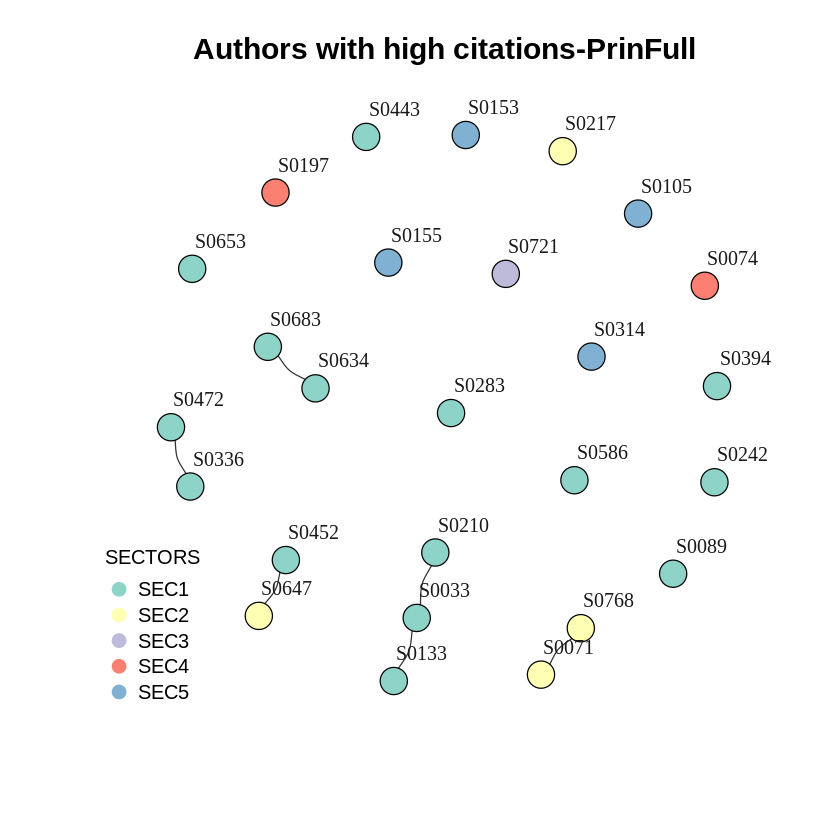

In [ ]:
#vidualizing which Citations is the most high.
#the red node shows that degree of node is more than 1.
my_pal <- brewer.pal(11,"Set3")

new_graph<-induced.subgraph(PRIN_graph, 
  which(V(PRIN_graph)$Citations %in% c("245","264","268",
  "272","277","284","299","305","310","314","326",
  "333","340","353","386","428","448","561","755",
  "804","1039","1143","1260","2564")))
#par(mar=c(0,0,0,0))
hh<-asNetwork(new_graph)
my_color <- my_pal[as.numeric(as.factor(V(new_graph)$Sector))]

V(new_graph)$color <- my_color

plot(new_graph, 
     vertex.size=10,edge.color="gray20", usecurve=TRUE,
     edge.lwd=0.02,
     vertex.label.dist=2,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1,edge.curved=0.3)

title(main="Authors with high citations-PrinFull", cex.main=1.5)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")

In [ ]:
it <- which(V(PRIN_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
ll <- induced.subgraph(graph=PRIN_graph,vids=it)
ll
l<-asNetwork(ll)
l

IGRAPH 5d25a54 UNW- 440 725 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)
+ edges from 5d25a54 (vertex names):
 [1] S0035--S0038 S0040--S0042 S0040--S0050 S0042--S0050 S0051--S0056
 [6] S0022--S0057 S0001--S0067 S0055--S0071 S0061--S0071 S0001--S0074
[11] S0063--S0075 S0071--S0075 S0072--S0075 S0040--S0080 S0031--S0082
[16] S0035--S0082 S0023--S0085 S0075--S0088 S0077--S0092 S0074--S0093
[21] S0056--S0102 S0085--S0107 S0066--S0117 S0062--S0121 S0069--S0121
[26] S0004--S0123 S0055--S0129 S0005--S0132 S0033--S0132 S0033--S0133
+ ... omitted several edges

 Network attributes:
  vertices = 440 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 725 
    missing edges= 0 
    non-missing edges= 725 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

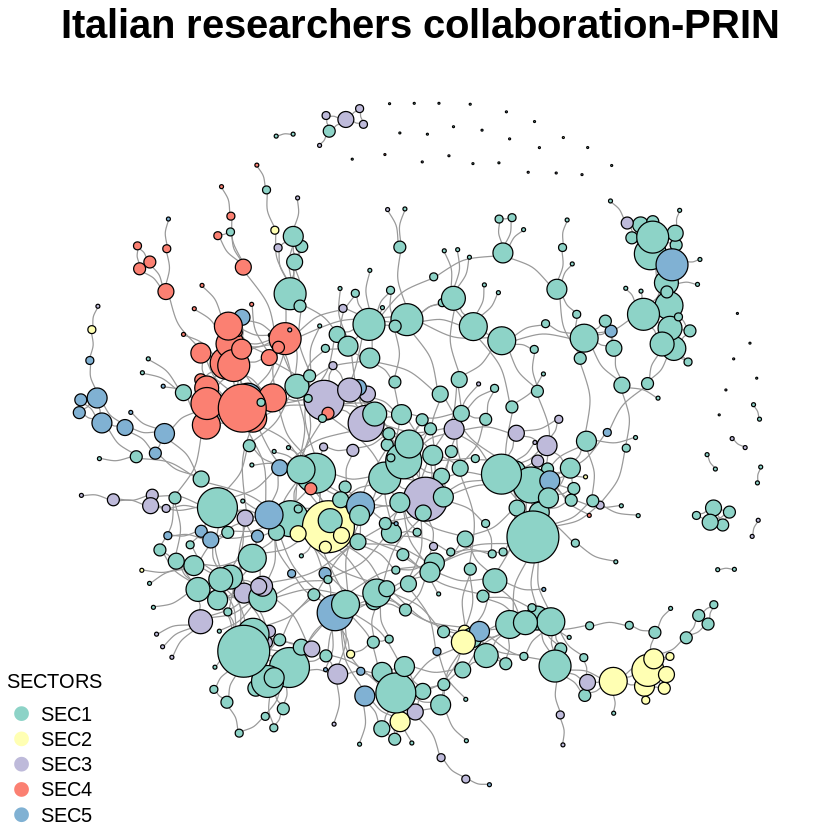

In [ ]:
#vidualizing based on the italian researchers and the size of node is proportional to degree.
my_pal <- brewer.pal(11,"Set3")

par(mar=c(0,0,2,0))

deg <- degree(l,rescale=TRUE)
V(ll)$size <- deg*1700

rolecat <- as.factor(get.vertex.attribute(l,"Sector"))
V(ll)$color<- my_pal[rolecat]

plot(ll,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers collaboration-PRIN", cex.main=2)

legend("bottomleft",legend=c("SEC1","SEC2","SEC3","SEC4","SEC5"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="SECTORS")




SECS-S/01 SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05 
      277        21        67        35        40 

[1] 0.010124

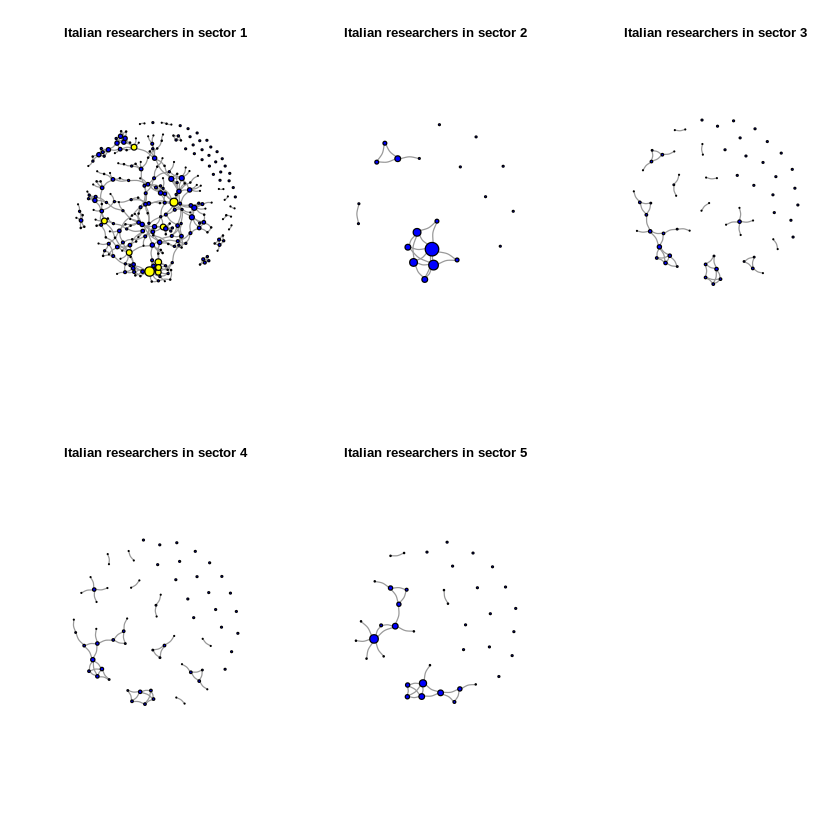

In [ ]:
#Vidulizing about collaboration of italian authors in each sector, as we can see from the 
#chart, in sector 1, autuors are more likely to collaborte together rather than other sectors

table(PRIN_NET %v% "Sector")
s1 <- get.inducedSubgraph(PRIN_NET,
                         which(PRIN_NET %v% "Sector"== "SECS-S/01"))
s1n<- asIgraph(s1)

par(mfrow=c(2,3))
deg <- degree(s1,rescale=TRUE)
V(s1n)$size <- deg*700
V(s1n)$color <- ifelse(degree(s1) > 15, "yellow", "blue")
V(s1n)$label.color <- "gray10"
plot(s1n,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers in sector 1", cex.main=1)



s2 <- get.inducedSubgraph(PRIN_NET,
                         which(PRIN_NET %v% "Sector"== "SECS-S/02"))
s2n<- asIgraph(s2)

#par(mar=c(1,1,1,1))
deg <- degree(s2,rescale=TRUE)
V(s2n)$size <- deg*100
V(s2n)$color <- ifelse(degree(s2) > 15, "yellow", "blue")
V(s2n)$label.color <- "gray10"
plot(s2n,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers in sector 2", cex.main=1)


s3 <- get.inducedSubgraph(PRIN_NET,
                         which(PRIN_NET %v% "Sector"== "SECS-S/03"))
s3n<- asIgraph(s3)

#par(mar=c(1,1,1,1))
deg <- degree(s3,rescale=TRUE)
V(s3n)$size <- deg*100
V(s3n)$color <- ifelse(degree(s3) > 15, "yellow", "blue")
V(s3n)$label.color <- "gray10"
plot(s3n,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers in sector 3", cex.main=1)



s4 <- get.inducedSubgraph(PRIN_NET,
                         which(PRIN_NET %v% "Sector"== "SECS-S/03"))
s4n<- asIgraph(s4)

#par(mar=c(1,1,1,1))
deg <- degree(s4,rescale=TRUE)
V(s4n)$size <- deg*100
V(s4n)$color <- ifelse(degree(s4) > 15, "yellow", "blue")
V(s4n)$label.color <- "gray10"
plot(s4n,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers in sector 4", cex.main=1)


s5 <- get.inducedSubgraph(PRIN_NET,
                         which(PRIN_NET %v% "Sector"== "SECS-S/05"))
s5n<- asIgraph(s5)

#par(mar=c(1,1,1,1))
deg <- degree(s5,rescale=TRUE)
V(s5n)$size <- deg*100
V(s5n)$color <- ifelse(degree(s5) > 15, "yellow", "blue")
V(s5n)$label.color <- "gray10"
plot(s5n,edge.color="gray60"
  ,pad=0.4,vertex.label=NA,edge.curved=0.3)
  title(main="Italian researchers in sector 5", cex.main=1)

gden(s1)


In [ ]:
#Basic Description
#network.size(PRIN_NET) #the # of authors
network.size(l) #the # of italian authors
gden(PRIN_NET)
components(PRIN_NET) # split into various subgroups
#In the following code the largest component is extracted into a new matrix.
#The geodesics (shortest paths) are then calculated for each pair of nodes using the
#geodist() function. The maximum geodesic is then extracted,
# which is the diameter for this component.
#lgc <- component.largest(PRIN_NET,result="graph")
#gd <- geodist(lgc)
#max(gd$gdist)
#count how many isolates there are:from this output.
table(component.dist(PRIN_NET)$csize)  #finding isolated
#As we can see the number of isoletd node is 7.
#the number of isolated node
length(V(PRIN_graph)$name[igraph::degree(PRIN_graph)==0]) #finding isolated
diameter(PRIN_graph)#The longest shortest path

centralization(PRIN_NET,degree, mode= "graph") 

#Closeness centrality-centrality based on distance to others in the graph
#CIS.clos<-igraph::closeness(PRIN_graph, mode="all")
centr_clo(PRIN_graph, mode="all", normalized=T)

#Eigen centrality-centrality proportional to the sum of connection centralities
#CIS.eigen<-eigen_centrality(CIS_graph, directed=F)
centr_eigen(PRIN_graph, directed=F, normalized=T)


[1] 440

[1] 0.002328138

[1] 27

[1] 17


   1    2    3    4    6    7   13   14   18   42 2696 
   7    8    3    1    1    2    1    1    1    1    1 

[1] 7

[1] 17

[1] 0.04068855

Warning message in centr_clo(PRIN_graph, mode = "all", normalized = T):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


$res
   [1] 0.0067618762 0.0067053362 0.0067637294 0.0067099178 0.0066971239
   [6] 0.0067190681 0.0067245289 0.0067245289 0.0066708036 0.0067408685
  [11] 0.0066438805 0.0067295836 0.0067527536 0.0067279563 0.0067543768
  [16] 0.0067671808 0.0067429025 0.0067154114 0.0066830249 0.0067208184
  [21] 0.0066365784 0.0067155385 0.0066998432 0.0067049243 0.0066791715
  [26] 0.0067258198 0.0067289613 0.0067232545 0.0066856699 0.0066721210
  [31] 0.0067454988 0.0067279882 0.0066633327 0.0067283073 0.0067079195
  [36] 0.0067164762 0.0067020741 0.0066217594 0.0066817662 0.0066229647
  [41] 0.0066931594 0.0066966656 0.0066471017 0.0066998591 0.0066022110
  [46] 0.0066511988 0.0066021188 0.0067107587 0.0067258198 0.0067045600
  [51] 0.0067232545 0.0067255010 0.0067179071 0.0067142198 0.0066968868
  [56] 0.0067289613 0.0067154590 0.0066791715 0.0066790143 0.0066764532
  [61] 0.0067655676 0.0066553789 0.0003573965 0.0066885218 0.0067181297
  [66] 0.0067164762 0.0067200705 0.0066966024 0.0067250707 0.0066747102
  [71] 0.0067102351 0.0067173665 0.0067292326 0.0067136480 0.0066646784
  [76] 0.0067109650 0.0067289932 0.0066627069 0.0067340547 0.0066755423
  [81] 0.0067105842 0.0067243696 0.0066747416 0.0067372839 0.0003523608
  [86] 0.0067309722 0.0066971239 0.0067233500 0.0067075707 0.0067003652
  [91] 0.0067346619 0.0067447133 0.0067210890 0.0067511954 0.0066324372
  [96] 0.0065464712 0.0066770658 0.0066738626 0.0066919284 0.0066889947
 [101] 0.0067317386 0.0067406763 0.0003526093 0.0066885060 0.0067773782
 [106] 0.0067243696 0.0067301741 0.0066972029 0.0066945962 0.0067251504
 [111] 0.0003543578 0.0067584624 0.0067288496 0.0067232545 0.0067172552
 [116] 0.0067313713 0.0066908714 0.0067174619 0.0003537314 0.0003523608
 [121] 0.0067350135 0.0067347099 0.0067621662 0.0067287699 0.0066276976
 [126] 0.0067242580 0.0067044332 0.0067262980 0.0003537314 0.0067348697
 [131] 0.0067129016 0.0066519159 0.0067347898 0.0066966340 0.0003543584
 [136] 0.0067401801 0.0067524644 0.0067258198 0.0066721523 0.0067210731
 [141] 0.0066940435 0.0067252938 0.0066864417 0.0067186705 0.0066945962
 [146] 0.0067473431 0.0066472729 0.0066460587 0.0067347898 0.0066989102
 [151] 0.0067529303 0.0066141666 0.0067044016 0.0066971555 0.0066738626
 [156] 0.0067047183 0.0067047183 0.0066480671 0.0066996060 0.0065653259
 [161] 0.0066965076 0.0066625818 0.0066860321 0.0066962390 0.0067075866
 [166] 0.0067329523 0.0066937909 0.0066306397 0.0067443767 0.0067415730
 [171] 0.0067060967 0.0067080781 0.0067175732 0.0067275257 0.0066966656
 [176] 0.0067282434 0.0066835443 0.0067347099 0.0067002071 0.0067204524
 [181] 0.0067208980 0.0066963180 0.0067046867 0.0003529824 0.0067081890
 [186] 0.0066830564 0.0067131239 0.0067289294 0.0067387397 0.0066389226
 [191] 0.0067232545 0.0066830564 0.0066832138 0.0067050193 0.0067560651
 [196] 0.0067445210 0.0067689563 0.0067001912 0.0067461723 0.0067286582
 [201] 0.0066627069 0.0067244970 0.0066939488 0.0067287858 0.0067062710
 [206] 0.0066405071 0.0066996060 0.0066184393 0.0066919284 0.0067596697
 [211] 0.0066962074 0.0066848037 0.0067312755 0.0066548795 0.0066652262
 [216] 0.0066856699 0.0066365939 0.0003537314 0.0067620695 0.0067258198
 [221] 0.0066662595 0.0066764532 0.0067537499 0.0067069842 0.0067523519
 [226] 0.0067445530 0.0066972029 0.0067190522 0.0067527696 0.0067003020
 [231] 0.0066876234 0.0067173347 0.0067558239 0.0066976454 0.0067232545
 [236] 0.0067232545 0.0066901931 0.0067338949 0.0067075707 0.0067544250
 [241] 0.0066987837 0.0067244970 0.0066848352 0.0067288496 0.0066097455
 [246] 0.0066184393 0.0067020267 0.0066874501 0.0003573965 0.0067231111
 [251] 0.0066790143 0.0066998432 0.0066365784 0.0066789200 0.0067303337
 [256] 0.0067265371 0.0067130287 0.0067959770 0.0067547144 0.0067585107
 [261] 0.0067192113 0.0065311646 0.0067772001 0.0066988628 0.0067246882
 [266] 0.0067650354 0.0067346619 0.0003573975 0.0066871034 0.0066872295
 [271] 0.0066708977 0.0066895939 0.0067527857 0.0067239235 0.0067167782
 [276] 0.0067559364 0.0067053678 0.

$vector
   [1] 5.336186e-04 9.000436e-07 1.619425e-02 1.628848e-06 1.107399e-06
   [6] 1.434293e-05 4.553385e-04 4.553385e-04 2.409268e-09 3.976350e-04
  [11] 2.860495e-08 2.726378e-06 4.685976e-02 7.698424e-04 2.579756e-06
  [16] 4.856829e-01 5.331297e-04 5.961454e-07 2.183952e-08 5.616393e-05
  [21] 4.200978e-10 5.454940e-07 2.775716e-05 1.213254e-06 7.850370e-06
  [26] 1.045188e-05 7.767491e-02 2.937555e-07 3.794708e-07 6.539295e-07
  [31] 9.181636e-06 2.893512e-06 8.401458e-08 2.235033e-05 2.496650e-08
  [36] 5.747602e-07 1.697866e-05 6.208628e-09 5.603988e-08 1.287121e-08
  [41] 6.010252e-08 9.900939e-07 4.998124e-11 2.801846e-05 3.033167e-12
  [46] 1.952688e-09 7.769095e-10 4.477022e-07 1.045188e-05 1.395083e-06
  [51] 2.937555e-07 9.770140e-04 8.254622e-07 1.707634e-05 2.001194e-08
  [56] 9.241939e-02 1.448946e-06 7.850370e-06 4.149302e-08 7.324307e-07
  [61] 1.110988e-03 4.639532e-07 0.000000e+00 5.391123e-07 1.238564e-06
  [66] 5.747602e-07 4.846667e-04 8.619041e-07 5.140709e-04 5.857177e-10
  [71] 4.176459e-08 1.427573e-05 1.787047e-05 1.428553e-06 1.378190e-08
  [76] 9.843223e-08 2.252297e-01 1.987678e-08 4.134012e-05 2.282427e-08
  [81] 3.953767e-07 8.798466e-04 1.061112e-09 5.392170e-07 0.000000e+00
  [86] 5.238936e-05 1.107399e-06 1.577847e-05 5.575733e-08 2.879240e-06
  [91] 5.128488e-02 4.576543e-04 1.033740e-06 1.666873e-03 6.304799e-09
  [96] 3.970181e-13 5.167397e-08 5.466857e-07 2.797395e-06 3.620231e-08
 [101] 1.192911e-06 3.742837e-05 0.000000e+00 5.227514e-07 1.362209e-03
 [106] 8.798466e-04 5.886918e-02 2.903217e-08 1.894665e-07 4.809900e-05
 [111] 0.000000e+00 1.405295e-02 7.938039e-02 2.937555e-07 1.995482e-04
 [116] 1.788147e-05 3.840888e-09 1.650726e-07 0.000000e+00 0.000000e+00
 [121] 2.423995e-05 4.834163e-01 1.930934e-02 6.949882e-02 7.602209e-10
 [126] 1.802821e-03 1.086579e-06 1.646172e-06 0.000000e+00 5.816328e-07
 [131] 8.120172e-06 2.327031e-10 5.172434e-01 9.194579e-07 0.000000e+00
 [136] 2.656573e-07 1.334070e-02 1.045188e-05 6.961849e-07 1.002368e-06
 [141] 7.358985e-07 8.099744e-06 7.608710e-08 1.243684e-06 1.894665e-07
 [146] 1.366972e-07 4.483304e-07 2.109054e-08 5.172434e-01 2.441711e-08
 [151] 1.544907e-02 1.230496e-09 4.148468e-09 9.047241e-07 5.466857e-07
 [156] 1.065303e-06 1.065303e-06 2.148952e-09 2.197352e-05 1.982820e-12
 [161] 1.630621e-08 8.367712e-09 9.139640e-07 6.270001e-05 5.739804e-08
 [166] 5.218736e-04 9.019435e-07 7.622907e-11 6.262900e-04 2.088060e-06
 [171] 3.690462e-08 5.691877e-07 5.140660e-07 1.694874e-08 9.900939e-07
 [176] 1.640652e-05 1.869275e-08 4.834163e-01 4.479547e-07 1.824173e-05
 [181] 5.462228e-07 7.336408e-05 1.074936e-05 0.000000e+00 2.842217e-07
 [186] 2.330379e-08 9.340823e-08 7.629248e-02 1.745851e-05 5.257327e-10
 [191] 2.937555e-07 2.330379e-08 4.144538e-08 1.610064e-07 7.122133e-02
 [196] 4.617208e-01 1.296160e-02 1.298633e-06 1.713536e-05 5.166101e-02
 [201] 1.987678e-08 4.249332e-04 8.807883e-07 2.023278e-07 4.385695e-07
 [206] 1.945387e-11 2.197352e-05 2.439192e-08 2.797395e-06 7.589253e-02
 [211] 4.152696e-05 2.339154e-08 7.897578e-08 2.923062e-08 2.874963e-09
 [216] 3.794708e-07 4.332459e-10 0.000000e+00 2.400261e-05 1.045188e-05
 [221] 4.837636e-07 7.324307e-07 1.552112e-02 2.146063e-05 5.606227e-04
 [226] 4.752654e-01 2.686010e-08 1.383761e-05 1.396842e-02 1.176061e-06
 [231] 6.017149e-07 5.294805e-07 1.852463e-02 1.845771e-05 2.937555e-07
 [236] 2.937555e-07 1.583775e-05 4.353343e-04 5.580712e-08 1.111749e-04
 [241] 1.488764e-06 4.249332e-04 5.143580e-10 3.568921e-02 5.965183e-11
 [246] 2.439192e-08 2.305058e-06 5.352198e-07 0.000000e+00 5.354957e-05
 [251] 2.260749e-06 2.775716e-05 4.200978e-10 1.009926e-06 1.922554e-05
 [256] 1.236648e-05 6.099241e-08 3.995706e-01 5.020722e-04 4.480529e-05
 [261] 1.307209e-05 1.846538e-12 1.390947e-02 1.376317e-07 1.324163e-06
 [266] 5.131513e-01 5.128488e-02 0.000000e+00 9.954642e-08 1.314635e-07
 [271] 2.966297e-09 3.201719e-08 1.520059e-02 1.312338e-05 8.495032e-07
 [276] 1.684331e-02 6.918535e-07

In [ ]:

#Betweenness centrality-centrality based on a broker position connecting others
CIS.betw <- igraph::betweenness(PRIN_graph, directed = F, normalized = T)
edge_betweenness(PRIN_graph)
centralization(PRIN_NET,betweenness,  mode= "graph")


[1] 1.611504e+03 4.464519e+03 1.081064e+04 1.189473e+03 1.785752e+02
   [6] 1.785752e+02 6.478556e+02 1.785752e+02 1.785752e+02 4.385664e+03
  [11] 2.956981e+04 9.609149e+02 6.594866e+03 8.651817e+03 6.772141e+01
  [16] 2.699014e+02 1.636754e+03 2.076099e+04 3.581039e+03 1.699438e+02
  [21] 1.487691e+03 1.699438e+02 2.165572e+02 1.811405e+03 1.811405e+03
  [26] 1.618105e+02 1.519821e+04 2.450000e+01 9.574908e+03 1.699438e+02
  [31] 1.625605e+02 1.588801e+04 6.166995e+04 3.501021e+02 4.552340e+04
  [36] 3.501021e+02 3.137202e+02 1.828611e+04 3.137202e+02 3.137202e+02
  [41] 3.137202e+02 1.563700e+03 2.695000e+03 1.000000e+00 1.000000e+00
  [46] 1.000000e+00 1.000000e+00 2.700000e+01 1.000000e+00 2.660000e+03
  [51] 1.000000e+00 1.000000e+00 1.000000e+00 2.690000e+03 1.000000e+00
  [56] 1.000000e+00 2.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  [61] 2.690000e+03 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  [66] 2.690000e+03 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  [71] 1.000000e+00 2.694000e+03 6.467883e+03 5.334966e+03 2.694000e+03
  [76] 1.000000e+00 1.426197e+03 4.737759e+02 1.000000e+00 7.930266e+02
  [81] 1.000000e+00 2.226382e+03 2.215846e+02 1.693708e+01 2.300967e+02
  [86] 2.708031e+03 2.137093e+03 2.000000e+00 8.824008e+03 8.201000e+03
  [91] 2.061930e+04 2.695000e+03 1.237112e+04 1.582012e+04 8.973351e+03
  [96] 1.849594e+03 1.083185e+02 1.084723e+02 5.279716e+03 8.063392e+01
 [101] 1.085718e+02 8.382099e+01 1.084723e+02 1.084723e+02 3.020441e+01
 [106] 3.020441e+01 3.646427e+01 3.150264e+02 9.839616e+01 2.344875e+03
 [111] 3.020441e+01 3.151540e+02 2.650888e+02 3.035825e+01 3.020441e+01
 [116] 1.083185e+02 3.035825e+01 3.362106e+02 3.020441e+01 5.049135e+02
 [121] 1.083185e+02 2.344875e+03 1.405197e+02 3.619960e+02 3.035825e+01
 [126] 3.621498e+02 1.606593e+03 2.344875e+03 2.507683e+02 1.962241e+03
 [131] 1.791037e+02 1.373536e+03 1.555849e+02 1.000000e+00 1.333333e+00
 [136] 1.000000e+00 1.000000e+00 1.000000e+00 2.688333e+03 1.333333e+00
 [141] 2.692000e+03 1.000000e+00 2.000000e+00 1.318289e+03 1.376711e+03
 [146] 2.691000e+03 4.000000e+00 2.465476e+03 2.489664e+03 1.849268e+02
 [151] 2.833333e+00 1.849268e+02 1.000000e+00 1.000000e+00 3.511111e+00
 [156] 1.849268e+02 1.849268e+02 1.016704e+03 4.166667e+00 3.511111e+00
 [161] 3.511111e+00 3.511111e+00 1.849268e+02 1.849268e+02 3.511111e+00
 [166] 3.832350e+03 7.166667e+00 1.849268e+02 1.000000e+00 4.166667e+00
 [171] 1.849268e+02 1.849268e+02 1.849268e+02 3.511111e+00 1.849268e+02
 [176] 1.849268e+02 1.440023e+02 1.479399e+03 9.423029e+01 1.440023e+02
 [181] 1.512033e+02 1.440023e+02 1.727151e+02 5.425000e+00 1.199175e+01
 [186] 1.512033e+02 1.278665e+02 1.727151e+02 1.000000e+00 9.423029e+01
 [191] 4.600000e+00 9.423029e+01 9.423029e+01 1.000000e+00 1.514033e+02
 [196] 1.440023e+02 1.440023e+02 2.000000e+00 1.512033e+02 9.423029e+01
 [201] 3.381086e+03 1.872268e+02 1.000000e+00 1.849268e+02 1.849268e+02
 [206] 1.000000e+00 1.000000e+00 1.757066e+03 1.000000e+00 1.000000e+00
 [211] 1.000000e+00 1.849268e+02 1.000000e+00 1.000000e+00 1.000000e+00
 [216] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
 [221] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.333333e+00
 [226] 1.198880e+03 1.000000e+00 1.483787e+03 1.000000e+00 1.000000e+00
 [231] 1.000000e+00 9.219655e+02 1.384556e+02 1.000000e+00 1.000000e+00
 [236] 1.000000e+00 1.000000e+00 1.000000e+00 3.088518e+02 1.320727e+03
 [241] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
 [246] 1.000000e+00 1.000000e+00 1.000000e+00 1.326953e+03 1.000000e+00
 [251] 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.352047e+03
 [256] 1.000000e+00 1.000000e+00 1.000000e+00 1.750339e+03 1.000000e+00
 [261] 1.000000e+00 2.155001e+02 1.982143e+00 1.440023e+02 1.484190e+02
 [266] 1.440023e+02 1.000000e+00 1.000000e+00 1.427523e+02 2.695000e+03
 [271] 3.948425e+03 8.910107e+02 9.472394e+03 5.866824e+02 2.959314e+04
 [276] 6.264388e+04 2.691557e+03 5.628160e+

[1] 0.1638992

In [ ]:
transitivity(PRIN_graph,type = "global")#The global clustering coefficient is the number of closed triplets over the total number of triplets.
transitivity(PRIN_graph, type = "average")#The average of the local clustering coefficients of all the vertices


[1] 0.5365841

[1] 0.7991296

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“7 x values <= 0 omitted from logarithmic plot”


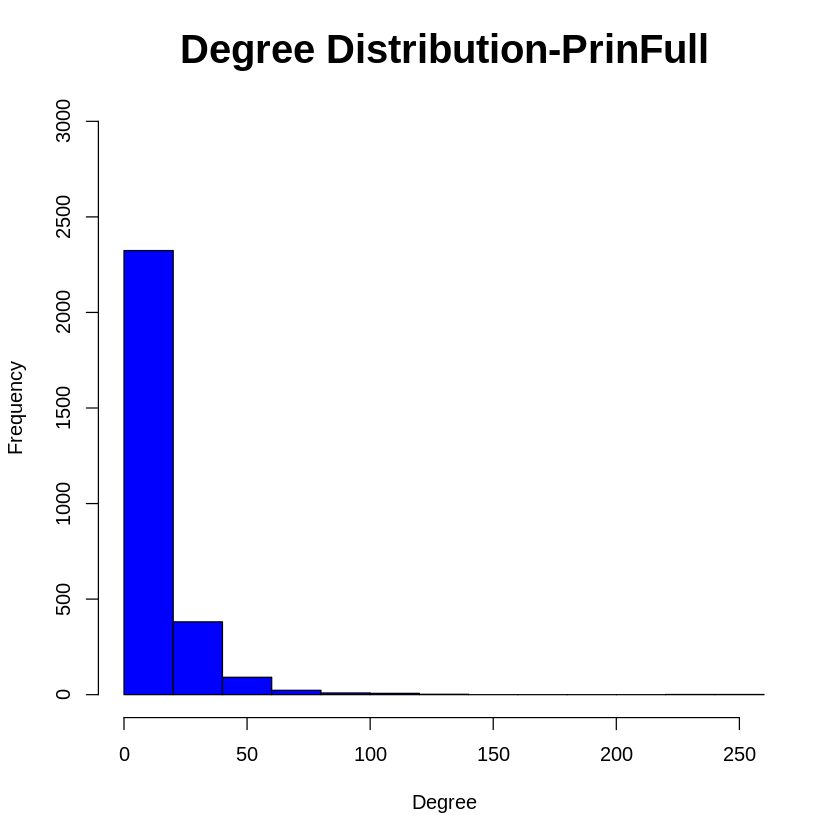

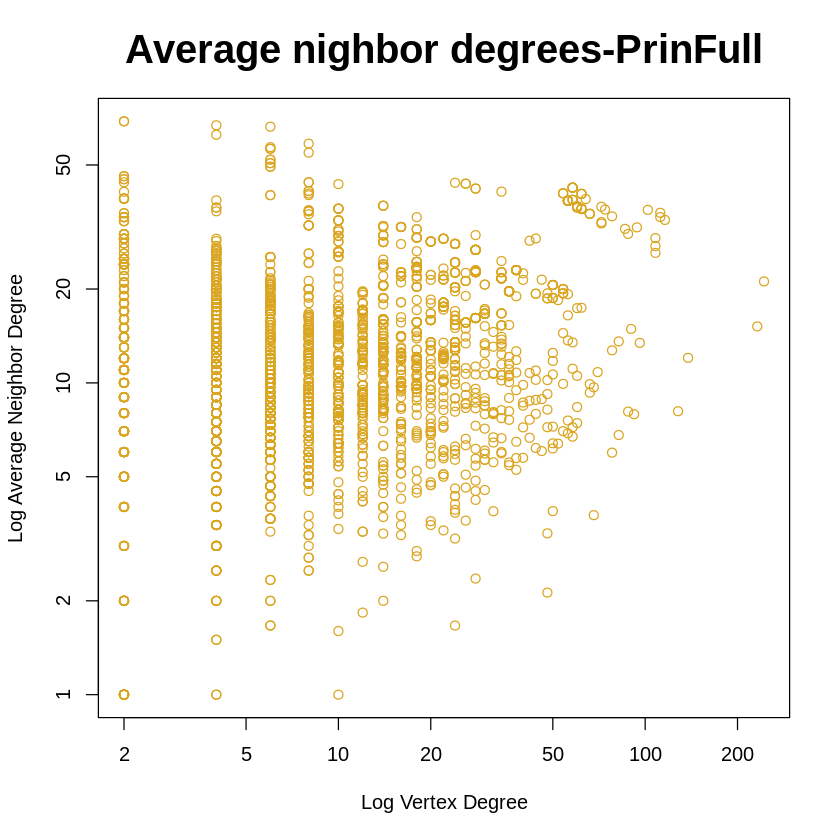

In [ ]:
#degree  Distribution
d1 <- degree(PRIN_NET)
hist(d1,col="blue",
         xlab="Degree", ylab="Frequency",
         main="Degree Distribution-PrinFull", ylim=c(0, 3000),cex.main=2)

#Interpretation: While there is a substantial number 
#of nodes of quite low degree, there are also a trivial
#number of nodes with higher order of degree magnitudes.
#, a plot of average neighbor degree versus vertex degree
a.nn.deg.yeast <- graph.knn(PRIN_graph,V(PRIN_graph))$knn
plot(d1, a.nn.deg.yeast, log="xy",
col="goldenrod", xlab=c("Log Vertex Degree"),
ylab=c("Log Average Neighbor Degree"))
title(main="Average nighbor degrees-PrinFull", cex.main=2)

#Interpretation: The plot "Log Average Neighbor Degree" suggests that while there
# is a tendency of nodes of higher degrees to link with similar nodes,
# nodes of lower degree tend to link with nodes of both lower and higher degrees.

In [ ]:
#Degree Centrality 
str(degree(PRIN_NET))
summary(degree(PRIN_NET,gmode="graph"))

 num [1:2839] 34 30 20 2 20 10 12 12 4 4 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   6.607   8.000 122.000 

In [ ]:
#correlations among a set of centrality measures
df.prom <- data.frame(
deg = degree(PRIN_NET,gmode="graph"),
btw = betweenness(PRIN_NET,gmode="graph")
)

cor(df.prom)

deg       btw      
deg 1.0000000 0.5370011
btw 0.5370011 1.0000000

In [ ]:
#Subgroups
#clique.number() does not
#return the number of cliques, but the size of the largest clique
numclq<-clique.number(PRIN_graph)
numclq
#maximal.cliques(PRIN_graph,min=10)

lrgclq<-largest.cliques(PRIN_graph)
lrgclq

#italian resercher in section 1 :
#there are 277 nodes (cliques
#of size one) and 387 edges (cliques of size two), followed by 132 triangles (cliques
#of size three).
table(sapply(cliques(ll), length))

#cliques(PRIN_graph)

[1] 29

[[1]]
+ 29/2839 vertices, named, from 5098d56:
 [1] S0768 A2078 A1973 A0659 A1820 A0877 A0097 A0107 A0119 A0141 A0352 A0433
[13] A0497 A0520 A0541 A0548 A0766 A0826 A0973 A1078 A1226 A1377 A1384 A1581
[25] A1692 A1787 A1880 A2051 A2193



  1   2   3   4   5 
440 725 297  52   3 

In [ ]:
#visulizing the largest clique.
# Assign largest cliques output to object 'lc'
lc <- largest_cliques(PRIN_graph)

# Create two new undirected subgraphs, each containing only the vertices of each largest clique.
gs1 <- as.undirected(subgraph(PRIN_graph, lc[[1]]))


# Plot the  largest cliques 

#par(mar=c(0,0,0,0))
my_color <- my_pal[as.numeric(as.factor(V(PRIN_graph)$Author.Type))]

V(gs1)$color <- my_color
plot(gs1,
     vertex.label.color = "blue", 
     vertex.label.cex = 0.9,
     vertex.size = 7,
     edge.color = 'gray80',
     main = "Largest Clique-PRIN",
    vertex.label.dist=2,main.cex=4

)
legend("bottomleft",legend=c("Italian_researchers","Foreign_researchers"),
col=my_pal,pch=19,pt.cex=1.5,bty="n",
title="Authors")

Warning message in subgraph(PRIN_graph, lc[[1]]):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”


ERROR: ignored

In [ ]:
#A k-core is a maximal subgraph where each vertex is
# connected to at least k other
#vertices in the subgraph. 
#It returns a vector listing the highest core 
#that each vertex belongs to in the network.
#The results tell us the k-cores range from 0 to 4 for italian Authors. 
coreness <- coreness(ll, mode="All")
table(coreness)
maxCoreness <- max(coreness) # THE NUMBER OF CORNESS IN GRAPH THAT IN THOS CASE IS 5
maxCoreness
f<- as.vector(unique(coreness))
f


coreness
  0   1   2   3   4 
 30 102 143 140  25 

[1] 4

[1] 4 2 1 3 0

In [ ]:
 coreness(ll, mode="All")
 #the coreness function produces a table listing
 # to which core each node belongs.

S0001 S0003 S0004 S0005 S0008 S0009 S0010 S0014 S0015 S0022 S0023 S0025 S0026 
    4     2     2     2     2     2     1     3     2     2     3     1     3 
S0027 S0029 S0031 S0033 S0035 S0036 S0038 S0039 S0040 S0041 S0042 S0044 S0047 
    0     3     2     3     3     2     2     3     2     1     3     3     2 
S0048 S0050 S0051 S0052 S0053 S0055 S0056 S0057 S0060 S0061 S0062 S0063 S0065 
    2     2     3     1     2     2     4     2     0     2     1     3     0 
S0066 S0067 S0069 S0071 S0072 S0074 S0075 S0076 S0077 S0078 S0080 S0081 S0082 
    3     4     3     3     3     4     3     1     3     2     2     2     2 
S0085 S0088 S0089 S0092 S0093 S0094 S0095 S0096 S0097 S0098 S0099 S0102 S0104 
    3     2     1     3     3     2     1     3     1     0     0     2     2 
S0105 S0107 S0108 S0109 S0117 S0120 S0121 S0122 S0123 S0124 S0125 S0127 S0128 
    0     1     0     3     3     1     3     0     3     3     2     0     0 
S0129 S0132 S0133 S0134 S0135 S0137 S0138 S0143 S0144 S0145 S0146 S0147 S0149 
    2     2     3     1     1     2     3     2     0     1     1     0     1 
S0150 S0153 S0155 S0156 S0157 S0159 S0160 S0166 S0174 S0176 S0178 S0179 S0180 
    4     3     4     1     1     3     3     3     1     3     0     2     2 
S0181 S0182 S0183 S0184 S0185 S0186 S0187 S0188 S0189 S0190 S0193 S0196 S0197 
    3     2     3     0     3     2     3     1     1     1     3     1     1 
S0198 S0199 S0200 S0201 S0209 S0210 S0211 S0213 S0217 S0219 S0223 S0224 S0226 
    2     2     1     1     2     1     4     2     1     1     0     3     2 
S0228 S0229 S0230 S0231 S0232 S0239 S0240 S0242 S0245 S0247 S0255 S0256 S0257 
    1     1     4     3     2     3     2     2     2     2     1     3     2 
S0259 S0263 S0264 S0267 S0268 S0269 S0270 S0271 S0273 S0274 S0275 S0276 S0277 
    3     2     3     3     2     2     2     2     2     3     3     2     1 
S0279 S0280 S0281 S0283 S0285 S0286 S0289 S0294 S0299 S0300 S0301 S0302 S0303 
    3     2     1     2     2     2     1     1     1     3     3     2     1 
S0305 S0308 S0309 S0310 S0311 S0313 S0314 S0318 S0319 S0320 S0323 S0324 S0325 
    3     2     1     2     2     3     2     1     3     2     3     2     3 
S0326 S0327 S0328 S0329 S0330 S0331 S0336 S0337 S0338 S0343 S0346 S0347 S0348 
    3     2     3     1     3     3     2     2     2     1     3     1     3 
S0350 S0352 S0353 S0354 S0357 S0358 S0360 S0362 S0363 S0365 S0366 S0367 S0371 
    3     2     0     1     3     3     3     3     3     3     1     2     0 
S0373 S0374 S0377 S0379 S0381 S0383 S0384 S0385 S0387 S0388 S0389 S0390 S0392 
    2     0     2     1     1     2     3     1     1     3     1     1     1 
S0393 S0394 S0395 S0397 S0398 S0399 S0403 S0404 S0406 S0407 S0408 S0409 S0413 
    3     3     4     2     3     3     3     2     1     3     2     2     2 
S0416 S0418 S0419 S0423 S0425 S0430 S0432 S0433 S0434 S0435 S0436 S0437 S0442 
    1     2     1     1     1     2     0     3     2     3     1     1     1 
S0443 S0445 S0447 S0449 S0451 S0452 S0456 S0462 S0463 S0464 S0466 S0467 S0469 
    2     3     1     2     1     3     1     4     3     1     1     4     3 
S0472 S0475 S0476 S0477 S0478 S0479 S0481 S0483 S0484 S0485 S0488 S0489 S0490 
    2     3     2     3     3     1     2     3     2     2     3     3     3 
S0492 S0493 S0496 S0501 S0504 S0505 S0506 S0507 S0508 S0509 S0511 S0514 S0515 
    3     2     1     3     2     0     3     2     1     1     2     4     1 
S0517 S0519 S0520 S0521 S0522 S0523 S0527 S0533 S0534 S0537 S0539 S0540 S0542 
    4     2     2     2     3     2     1     4     0     4     0     2     2 
S0544 S0546 S0547 S0549 S0550 S0551 S0553 S0554 S0556 S0561 S0563 S0564 S0565 
    2     1     1     3     2     3     2     0     3     1     2     2     3 
S0566 S0567 S0569 S0572 S0574 S0575 S0577 S0578 S0579 S0580 S0584 S0585 S0586 
    1     1     2     3     3     2     2     3     2     3     2     3     1 
S0590 S0591 S0592 S0593 S0594 S0595 S0596 S0601 S0

In [ ]:
#it shows us the nodes in k core
cores = graph.coreness(as.undirected(PRIN_graph))
head(sort(cores, decreasing=TRUE), 10)

A0097 A0107 A0119 A0141 A0352 A0433 A0497 A0520 A0541 A0548 
   28    28    28    28    28    28    28    28    28    28

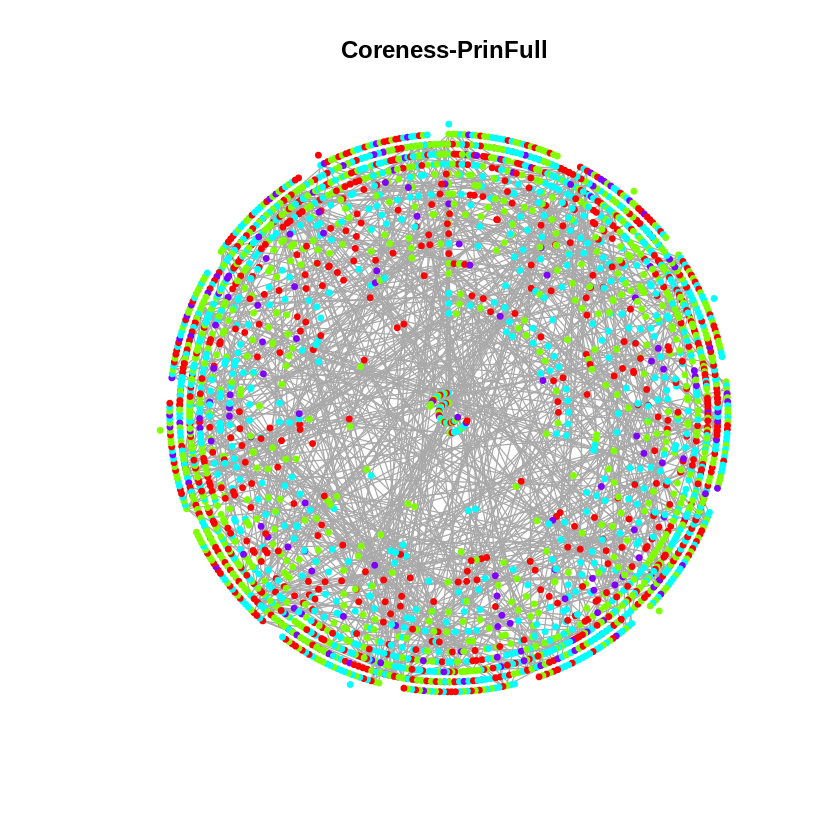

In [ ]:
#Creat layout
CorenessLayout <- function(g) {
coreness <- graph.coreness(g);
xy <- array(NA, dim=c(length(coreness), 2));
 
shells <- sort(unique(coreness));
for(shell in shells) {
v <- 1 - ((shell-1) / max(shells));
nodes_in_shell <- sum(coreness==shell);
angles <- seq(0,360,(360/nodes_in_shell));
angles <- angles[-length(angles)]; # remove last element
xy[coreness==shell, 1] <- sin(angles) * v;
xy[coreness==shell, 2] <- cos(angles) * v;
}
return(xy);
}

 
# g is the network
# compute coreness
coreness <- graph.coreness(ll);
# assign colors
colbar <- rainbow(max(coreness));
# create layout
lay <- CorenessLayout(PRIN_graph);
# plot
plot(ll,vertex.label=NA
, layout=lay, vertex.size=2,
 vertex.color=colbar[coreness],
vertex.frame.color=colbar[coreness], main='Coreness-PrinFull');
#This figure shows that the not center of the network is made up of the
#highest k-core. In this case, the 5-core is comprised  of the total nodes.



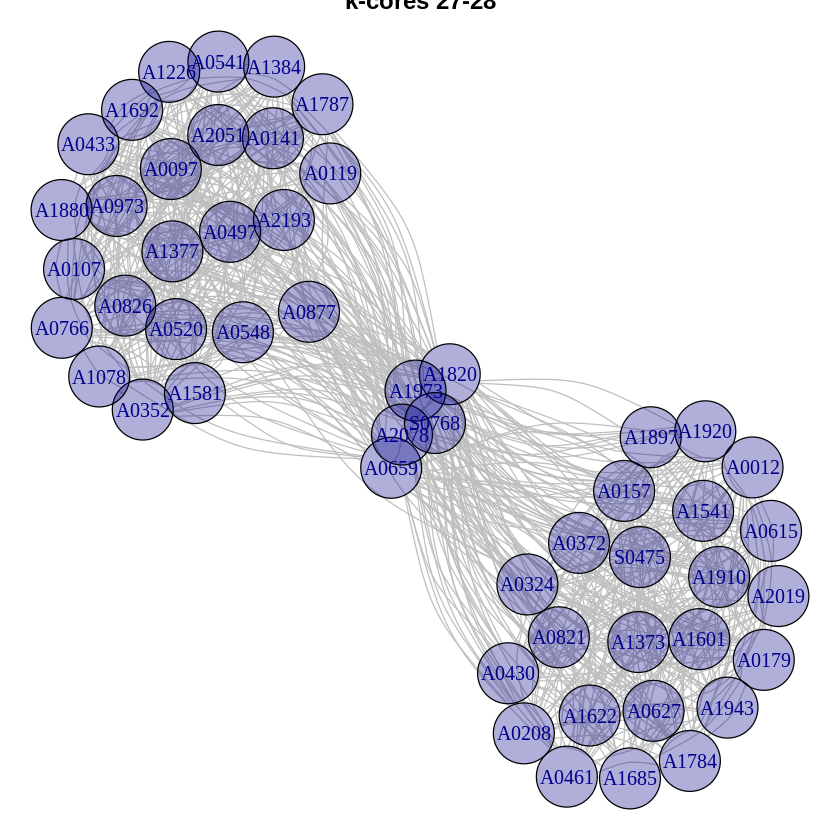

In [ ]:
# in the whole data set there 28 core . here i just plot core 27 and 28
coreness <- graph.coreness(PRIN_graph)
#V(PRIN_graph)$name <- coreness 
par(mar=c(0,0,0,0))

iD <- PRIN_graph
iD <- induced.subgraph(PRIN_graph,vids=which(coreness > 19))

plot(iD,main="k-cores 27-28",vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
vertex.size=17,edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3)

[1] "AASSVE A"       "BELLIO R"       "BETTI G"        "BILLARI FC"    
 [5] "CASTIGLIONI M"  "CAZZOLA A"      "DALLA ZUANNA G" "DE ROSE A"     
 [9] "LEMMI A"        "MAZZUCO S"      "MENCARINI L"    "NATILLI M"     
[13] "NERI L"         "ONGARO F"       "PACE L"         "PINNELLI A"    
[17] "RACIOPPI F"     "RETTAROLI R"    "ROSINA A"       "ROSSI F"       
[21] "SALVAN A"       "SALVATI N"      "SARTORI N"      "TOMASSINI C"   
[25] "VENTURA L"

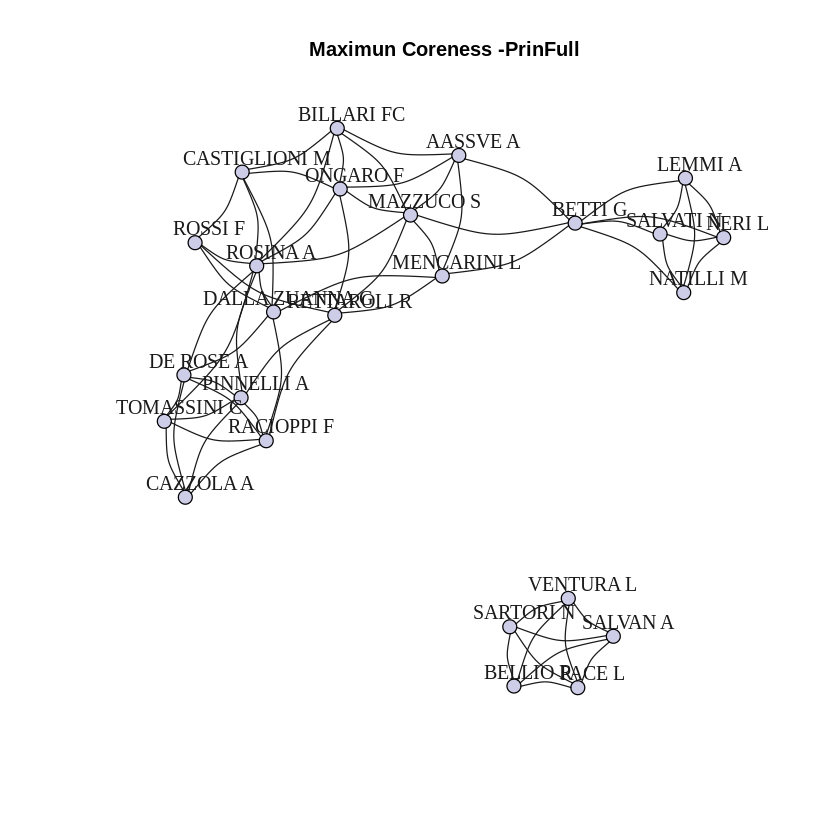

In [ ]:
#To find the authors with maximum coreness.
kcores <- coreness(ll)
verticesHavingMaxCoreness <- which(kcores == max(kcores)) 
V(ll)$Author[verticesHavingMaxCoreness]
#To plot authors with maximum core. 
# Add edge attribute id values
E(ll)$id <- seq(ecount(ll))
# Extract subgraph
MaxCorenessPlot <- induced.subgraph(graph=ll,vids=verticesHavingMaxCoreness)
#Plot subgraph
plot(MaxCorenessPlot,vertex.color=rgb(0,0,139,alpha=50,maxColorValue=255),
vertex.size=5,edge.color="gray10", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label.dist=1,
     pad=0.9,
     edge.arrow.size=.1,
     vertex.label.color ="gray10",
     vertex.label.cex=1,
     vertex.label=V(ll)$Author[verticesHavingMaxCoreness])
title(main="Maximun Coreness -PrinFull", cex.main=1)

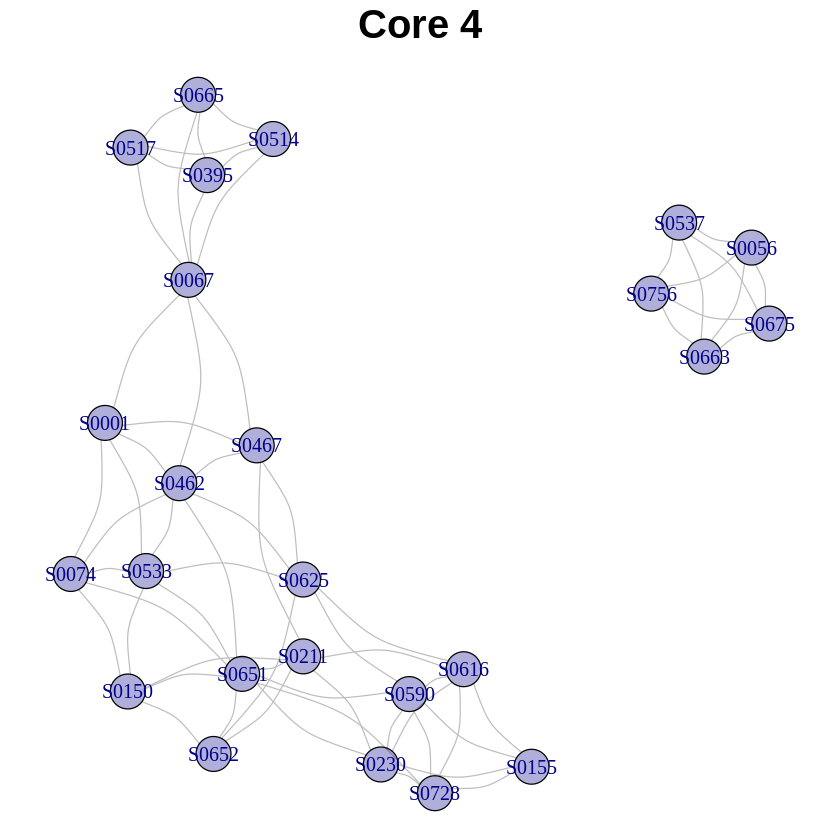

In [ ]:
#for italian data set , i plot core 4 and 5
coreness <- graph.coreness(ll)
#V(PRIN_graph)$name <- coreness
par(mar=c(0,0,2,0))

iD <- ll
iD <- induced.subgraph(ll,vids=which(coreness >3))

plot(iD,vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
vertex.size=10,edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3)

title(main="Core 4", cex.main=2)


In [ ]:
#vidualizing when coreness is equall to 3
coreness <- graph.coreness(PRIN_graph)
#V(PRIN_graph)$name <- coreness
par(mar=c(0,0,2,0))

iD <- PRIN_graph
iD <- induced.subgraph(PRIN_graph,vids=which(coreness==3))

plot(iD,main="k-cores 27-28",vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
vertex.size=4,edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,
vertex.label=NA)

ERROR: ignored

In [ ]:
COM <- decompose.graph(PRIN_graph)
#A census of all connected components within this graph, however, shows that there
#clearly is a giant componentwith 2696 vertices, 
#This  component contains more than 90% of the vertices in the network.
table(sapply(COM, vcount))

COM.gc <- decompose.graph(PRIN_graph)[[1]]
#e average path length in the giant component is barely greater than 6
average.path.length(COM.gc)[[1]]
#n the longest of paths
diameter(COM.gc)
#In the case of the giant component of the  network, the vertex and edge
#connectivity are both equal to one.
#Thus it requires the removal of only a single well-chosen vertex or edge in order to
#break this subgraph into additional components.
vertex.connectivity(COM.gc)
edge.connectivity(COM.gc)
#In the giant component of the data network,
#almost 10% of the vertices are cut vertices.(262) out of all nodes
P.cut.vertices <- articulation.points(COM.gc)
length(P.cut.vertices)


   1    2    3    4    6    7   13   14   18   42 2696 
   7    8    3    1    1    2    1    1    1    1    1 

[1] 6.52217

[1] 17

[1] 1

[1] 1

[1] 262

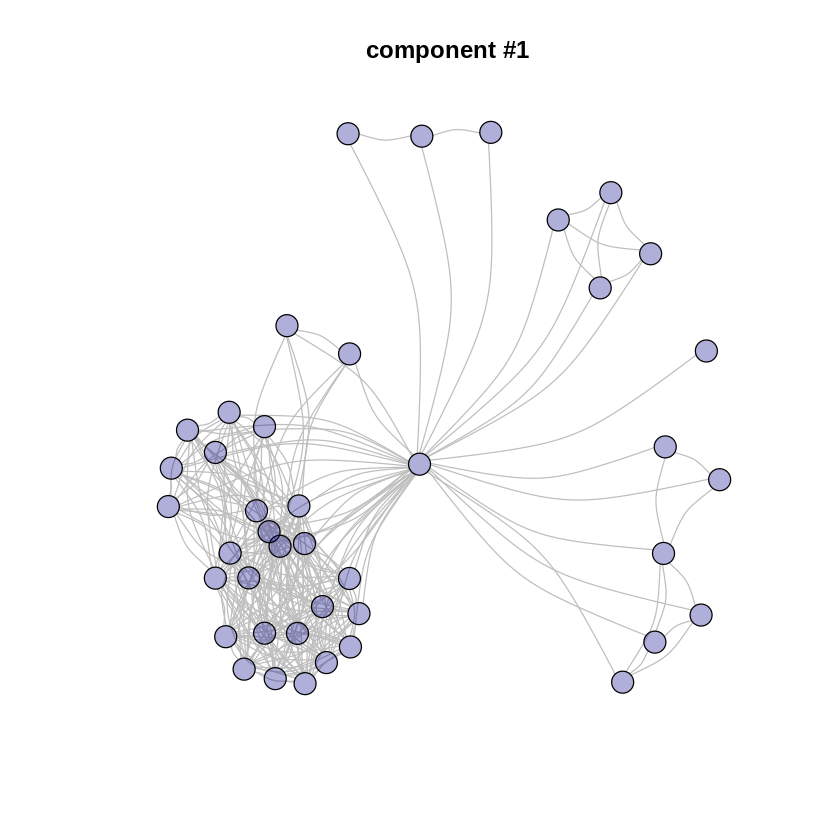

In [ ]:
#Vidualizing 2  component. # 2 
par(mfrow=c(1,1))

plot(COM[[2]], vertex.size=8, vertex.label=NA,vertex.color=rgb(0,0,139,alpha=80,maxColorValue=255),
edge.color="gray", usecurve=TRUE,edge.lwd=0.02,edge.curved=0.3,main=" component #1")


The basic workflow for conducting community detection in igraph is to run
one of the community detection functions on a network and store the results in
a communities class object.
Then, the identified subgroups in the network can
be explored using a number of igraph functions that know how to operate with
communities objects. The networks can also be plotted easily to show the results
of the community detection.

In [ ]:
#From graph, I extract all clusters 

modules <- decompose.graph(PRIN_graph)
out <- modules[order(sapply(modules, ecount), decreasing=T)]
length(out)
out
#min.vertices = 10


#a quick glance at plot reveals that this graph is not composed
# of a single connected component.
#So 2696 of the nodes are in a single large component and the
# remaining 143 are in 26 small components. The 2696 nodes in
# the big component overwhelm the smaller components and the 26 
#small components acts as visual clutter for the big component.
# Let's separate the 26 small components.

[1] 27

[[1]]
IGRAPH df1c9df UNW- 2696 8954 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)
+ edges from df1c9df (vertex names):
 [1] S0001--A0093 S0001--S0067 S0001--S0074 S0001--A0601 S0001--A0732
 [6] S0001--A0836 S0001--A1064 S0001--A1105 S0001--A1109 S0001--S0462
[11] S0001--S0463 S0001--S0467 S0001--S0533 S0001--S0584 S0001--A1693
[16] S0001--A1695 S0001--A2007 A0001--S0009 A0001--A0027 A0001--A0113
[21] A0001--A0274 A0001--A0353 A0001--A0598 A0001--A0777 A0001--A0930
[26] A0001--A0957 A0001--S0353 A0001--A1369 A0001--A1594 A0001--A2052
+ ... omitted several edges

[[2]]
IGRAPH c33a75f UNW- 42 299 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c), weight
| (e/n)
+ edges from c33a75f (vertex names):
 [1] A0051--A0199 A0210--A0299 A0210--A0331 A0299--A0331 A0210--A0374
 [6] A0331--A0374 A0210--A0411 A

In [ ]:
install.packages("rainbow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pcaPP’, ‘hdrcde’, ‘ks’




In [ ]:
head(modules)[1:3]

[[1]]
IGRAPH eac2217 UNW- 2696 8954 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c),
| nodedegree (v/n), size (v/n), weight (e/n)
+ edges from eac2217 (vertex names):
 [1] S0001--A0093 S0001--S0067 S0001--S0074 S0001--A0601 S0001--A0732
 [6] S0001--A0836 S0001--A1064 S0001--A1105 S0001--A1109 S0001--S0462
[11] S0001--S0463 S0001--S0467 S0001--S0533 S0001--S0584 S0001--A1693
[16] S0001--A1695 S0001--A2007 A0001--S0009 A0001--A0027 A0001--A0113
[21] A0001--A0274 A0001--A0353 A0001--A0598 A0001--A0777 A0001--A0930
[26] A0001--A0957 A0001--S0353 A0001--A1369 A0001--A1594 A0001--A2052
+ ... omitted several edges

[[2]]
IGRAPH 6dccc3a UNW- 42 299 -- 
+ attr: name (v/c), Author (v/c), Sector (v/c), H.Index (v/n), NumDocs
| (v/n), References (v/n), Citations (v/n), Author.Type (v/c),
| nodedegree (v/n), size (v/n), weight (e/n)
+ edges from 6dccc3a (vertex names):
 [1] A0051--A0199 A0210--A0299 A0210--A033

In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 2:length(out)) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
g3 <- induced.subgraph(graph=PRIN_graph,vids=subv)
g4<-asNetwork(g3)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}



In [ ]:
#I can calculate the betweenness of this  graph and display the outcome:
wc <- edge.betweenness.community(g3, weights = NULL
                                 ,directed = FALSE,bridges = TRUE)

#This splits up each sub cluster as a community.



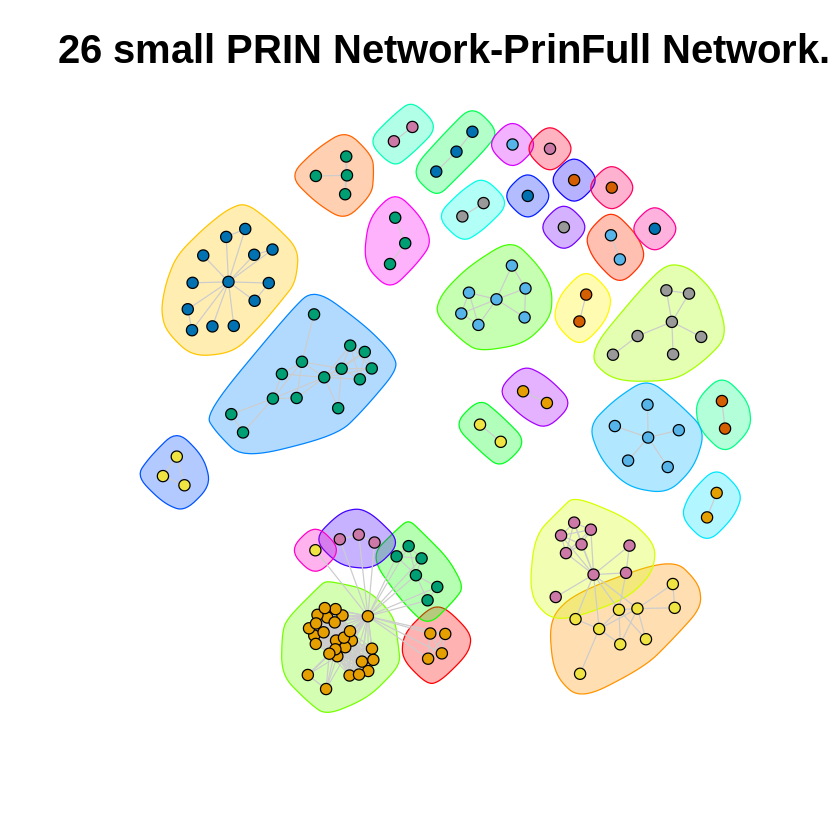

In [ ]:
## Let's separate the 26 small components.
plot(wc, g3, vertex.size=4,
edge.color="gray80",
     vertex.label=NA)

          title(main="26 small PRIN Network-PrinFull Network.", cex.main=2)


In [ ]:
vertexes <- character()
data_frames <- list()
for(i in 1:1) {
  vertexes[i] <- list(vertex.attributes(out[[i]])$name)
  data_frames[[i]] <- get.data.frame(out[[i]])
}
sub_nodes = unlist(vertexes)
subv <- sub_nodes
LargeComp <- induced.subgraph(graph=PRIN_graph,vids=subv)
g6<-asNetwork(LargeComp)
rescale <- function(nchar,low,high) {
min_d <- min(nchar)
max_d <- max(nchar)
rscl <- ((high-low)*(nchar-min_d))/(max_d-min_d)+low
rscl
}


In [ ]:
#There are several community detection algorithm.
#The best result is given by Louvain and  Girvan-newman(edge betweeness) algorithms.
# I will implement cluster_louvain algorithms.
wc <- fastgreedy.community(LargeComp)
modularity(wc)

wc <- edge.betweenness.community(LargeComp)
modularity(wc)

wc <- leading.eigenvector.community(LargeComp)
modularity(wc)

wc <- label.propagation.community(LargeComp)
modularity(wc)

wc <- cluster_louvain(LargeComp)
modularity(wc)

[1] 0.8578262

Warning message in edge.betweenness.community(LargeComp):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”
Warning message in edge.betweenness.community(LargeComp):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”


[1] 0.8916271

[1] 0.6929504

[1] 0.8020302

[1] 0.8972175

In [ ]:
LC.gn.comm <- edge.betweenness.community(LargeComp, weights = NULL
                                 ,directed = FALSE,bridges = TRUE)
max(LC.gn.comm$membership)





[1] 43

In [ ]:
LC.gn.comm 

IGRAPH clustering edge betweenness, groups: 43, mod: 0.89
+ groups:
  $`1`
   [1] "S0001" "A0022" "A0039" "A0047" "A0060" "A0093" "A0110" "A0177" "A0183"
  [10] "A0198" "S0074" "S0089" "S0095" "S0104" "A0276" "A0410" "S0174" "A0589"
  [19] "A0601" "A0605" "A0638" "A0643" "A0646" "A0665" "A0679" "A0732" "A0779"
  [28] "A0825" "S0289" "A0836" "A0864" "A0875" "A0879" "A0895" "S0344" "A1040"
  [37] "A1064" "A1068" "S0375" "A1099" "A1105" "A1109" "A1115" "A1125" "A1127"
  [46] "A1180" "A1183" "A1217" "A1237" "A1245" "A1252" "S0456" "S0462" "A1340"
  [55] "S0463" "S0467" "A1374" "A1385" "A1460" "A1471" "S0533" "A1499" "A1506"
  [64] "A1531" "A1577" "A1613" "S0584" "A1662" "S0607" "A1693" "A1695" "A1721"
  [73] "A1745" "S0625" "A1781" "A1797" "A1814" "A1852" "S0667" "A1944" "A1970"
  + ... omitted several groups/vertices

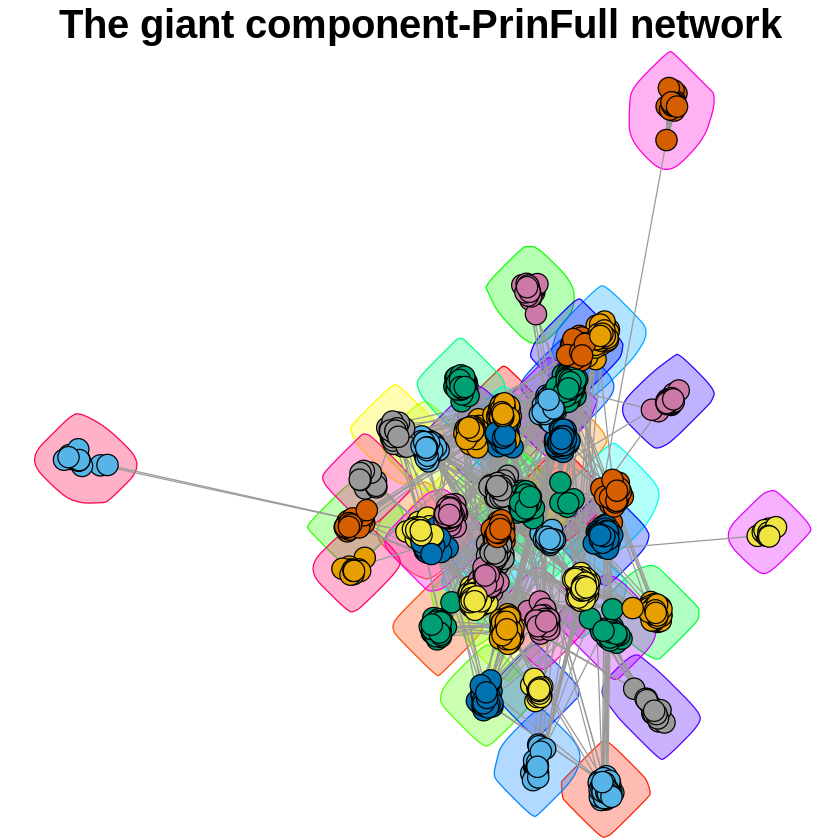

In [ ]:
#we can position vertices in the same community group together and 
#make different communities stay further apart.
LC_Grouped = LargeComp
E(LC_Grouped)$weight = 1
for(i in unique(membership(LC.gn.comm))) {
    GroupV = which(membership(LC.gn.comm) == i)
    LC_Grouped = add_edges(LC_Grouped, combn(GroupV, 2), attr=list(weight=6))
} 

set.seed(1234)
LO = layout_with_fr(LC_Grouped)
colors <- rainbow(max(membership(LC.gn.comm)))
par(mar=c(0,0,2,0))
plot(LC.gn.comm, LargeComp, layout=LO,
    vertex.size = 6, 
    vertex.color=colors[membership(LC.gn.comm)], 
    vertex.label = NA, edge.width = 1,edge.color="gray60")

              title(main="The giant component-PrinFull network",sub="Girvan-Newman Algorithm", cex.main=2)


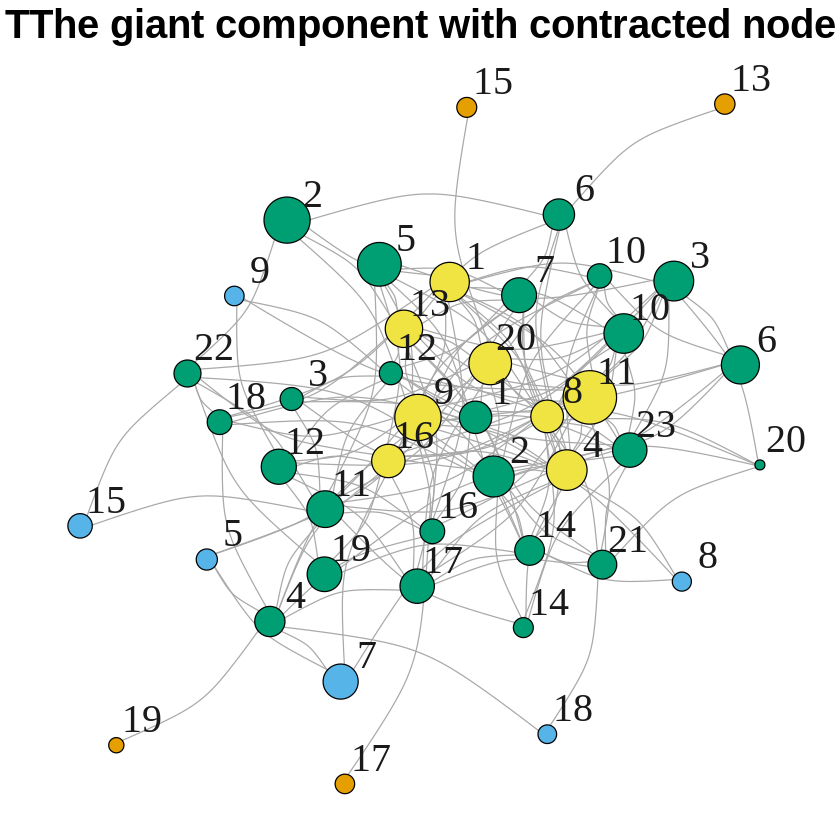

In [ ]:
#Contract the Communities

#Just plot a single node for each community. Here,
# I make the area of each community vertex proportional
# to the number of members of that community 
#I colored the vertices using a coarse grouping based on their degrees.
GN.Comm = simplify(contract(LargeComp, membership(LC.gn.comm)))
D<- unname(igraph::degree(GN.Comm))

set.seed(1234)
par(mar=c(0,0,2,0))
plot(GN.Comm, vertex.size=sqrt(sizes(LC.gn.comm))*1.2,
    vertex.label=1:23, vertex.cex = 2,
   vertex.color=round(log(D))+1,
   layout=layout.lgl,  vertex.label.cex=2,edge.curved=0.3, 
   vertex.label.color ="gray10",vertex.label.dist=1.5
)
              title(main="TThe giant component with contracted node",sub="Girvan-Newman Algorithm", cex.main=2)


In [ ]:
#I calculate the betweenness of each subgraph by doing:
#Community Structure Detection Based On Edge Betweenness
#Many networks consist of modules which are densely connected 
#themselves but sparsely connected to other modules.

#Girvan-Newman produces 43 communities within this large component

betweenness_sub <- list()
for(i in 1:length(out)) {
  btws <- edge.betweenness.community(out[[i]], weights = NULL
                                                   ,directed = FALSE,bridges = TRUE)
  print(btws)
  betweenness_sub[[i]] <- btws
}

IGRAPH clustering edge betweenness, groups: 43, mod: 0.89
+ groups:
  $`1`
   [1] "S0001" "A0022" "A0039" "A0047" "A0060" "A0093" "A0110" "A0177" "A0183"
  [10] "A0198" "S0074" "S0089" "S0095" "S0104" "A0276" "A0410" "S0174" "A0589"
  [19] "A0601" "A0605" "A0638" "A0643" "A0646" "A0665" "A0679" "A0732" "A0779"
  [28] "A0825" "S0289" "A0836" "A0864" "A0875" "A0879" "A0895" "S0344" "A1040"
  [37] "A1064" "A1068" "S0375" "A1099" "A1105" "A1109" "A1115" "A1125" "A1127"
  [46] "A1180" "A1183" "A1217" "A1237" "A1245" "A1252" "S0456" "S0462" "A1340"
  [55] "S0463" "S0467" "A1374" "A1385" "A1460" "A1471" "S0533" "A1499" "A1506"
  [64] "A1531" "A1577" "A1613" "S0584" "A1662" "S0607" "A1693" "A1695" "A1721"
  [73] "A1745" "S0625" "A1781" "A1797" "A1814" "A1852" "S0667" "A1944" "A1970"
  + ... omitted several groups/vertices
IGRAPH clustering edge betweenness, groups: 7, mod: 0.11
+ groups:
  $`1`
  [1] "A0051" "A0199" "A0493" "A1284"
  
  $`2`
   [1] "A0210" "A0299" "A0331" "A0374" "A0411" "A042

In [ ]:
head(betweenness_sub)

[[1]]
IGRAPH clustering edge betweenness, groups: 43, mod: 0.89
+ groups:
  $`1`
   [1] "S0001" "A0022" "A0039" "A0047" "A0060" "A0093" "A0110" "A0177" "A0183"
  [10] "A0198" "S0074" "S0089" "S0095" "S0104" "A0276" "A0410" "S0174" "A0589"
  [19] "A0601" "A0605" "A0638" "A0643" "A0646" "A0665" "A0679" "A0732" "A0779"
  [28] "A0825" "S0289" "A0836" "A0864" "A0875" "A0879" "A0895" "S0344" "A1040"
  [37] "A1064" "A1068" "S0375" "A1099" "A1105" "A1109" "A1115" "A1125" "A1127"
  [46] "A1180" "A1183" "A1217" "A1237" "A1245" "A1252" "S0456" "S0462" "A1340"
  [55] "S0463" "S0467" "A1374" "A1385" "A1460" "A1471" "S0533" "A1499" "A1506"
  [64] "A1531" "A1577" "A1613" "S0584" "A1662" "S0607" "A1693" "A1695" "A1721"
  [73] "A1745" "S0625" "A1781" "A1797" "A1814" "A1852" "S0667" "A1944" "A1970"
  + ... omitted several groups/vertices

[[2]]
IGRAPH clustering edge betweenness, groups: 7, mod: 0.11
+ groups:
  $`1`
  [1] "A0051" "A0199" "A0493" "A1284"
  
  $`2`
   [1] "A0210" "A0299" "A0331" "A0374" 

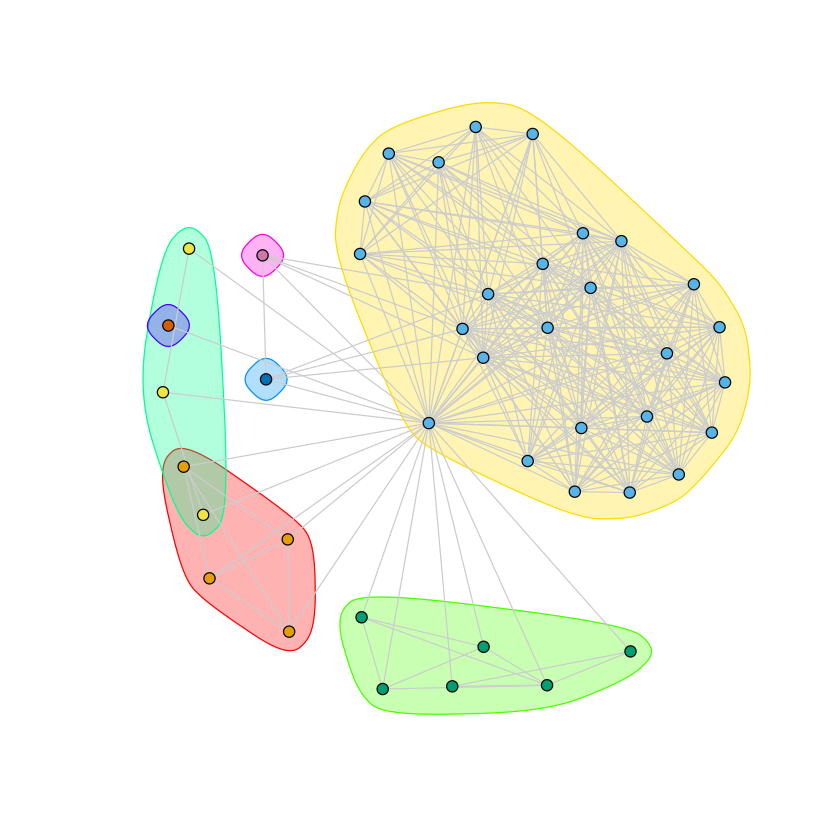

In [ ]:
#Whereas, if we consider the biggest cluster individually, we get:
#I can plot these individually by doing:
plot(betweenness_sub[[2]], out[[2]], vertex.size=4,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)



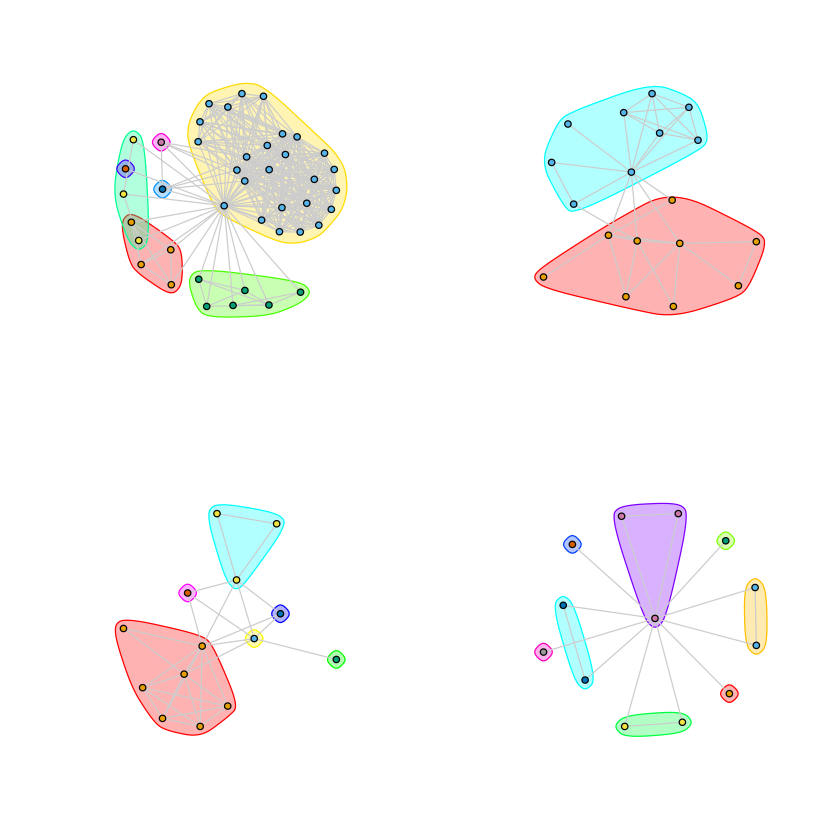

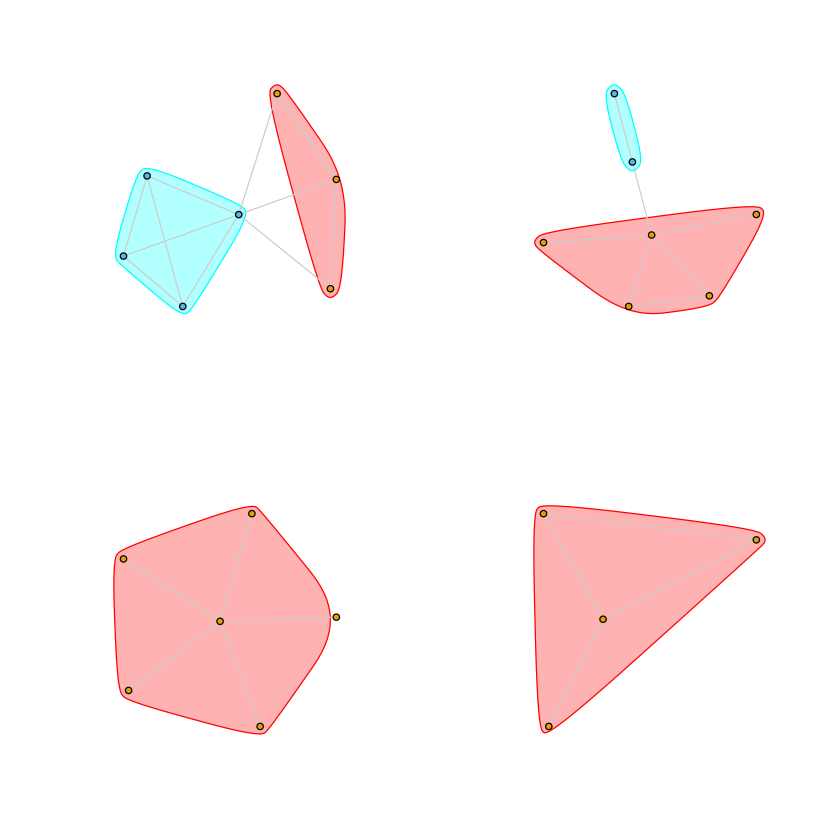

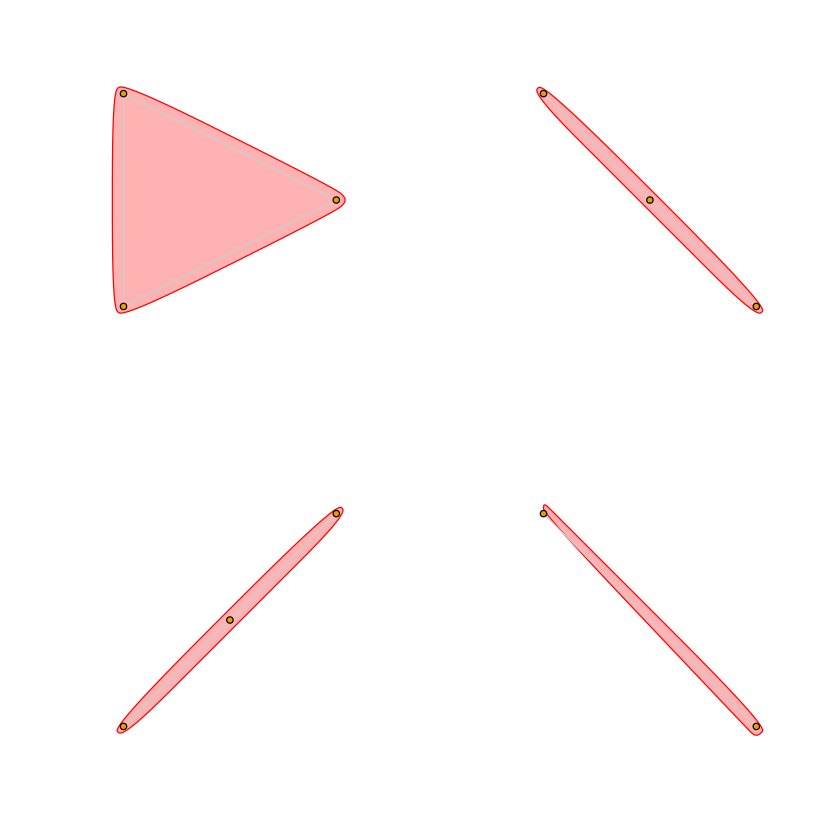

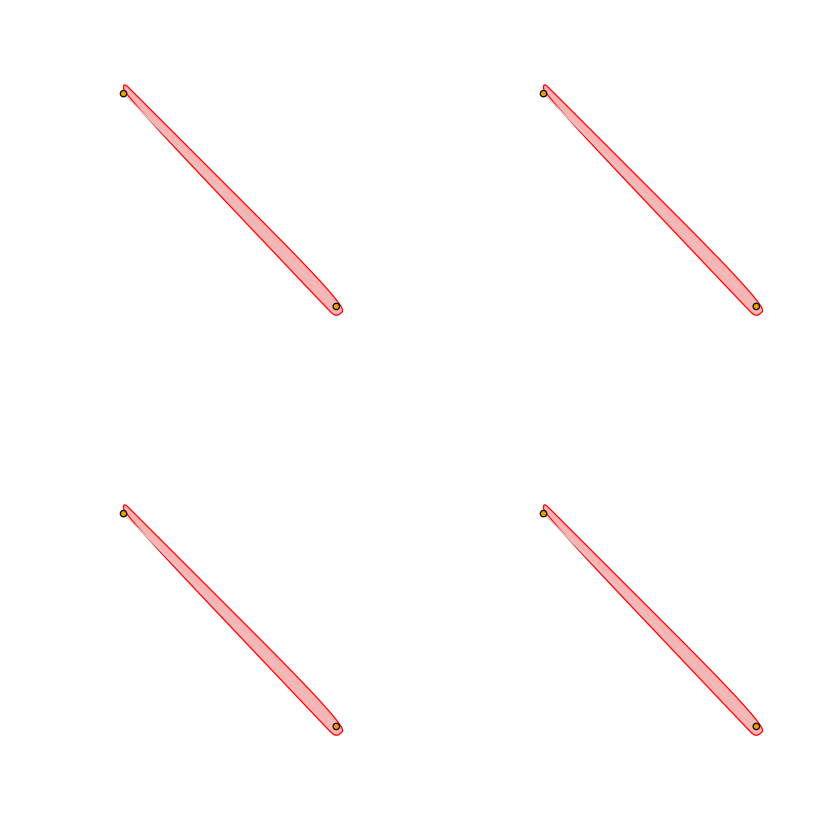

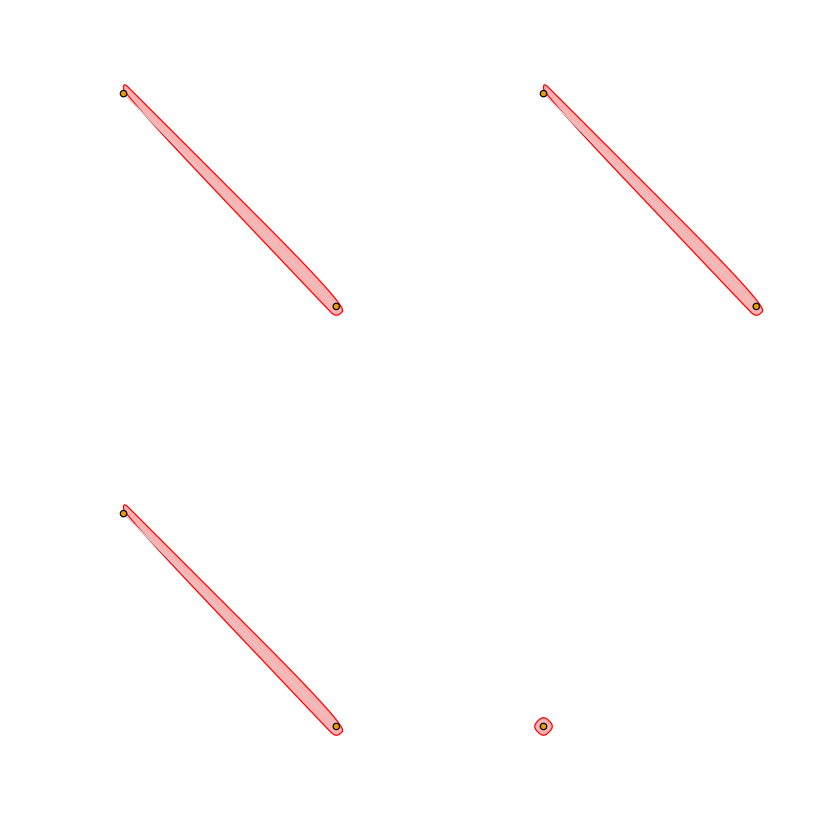

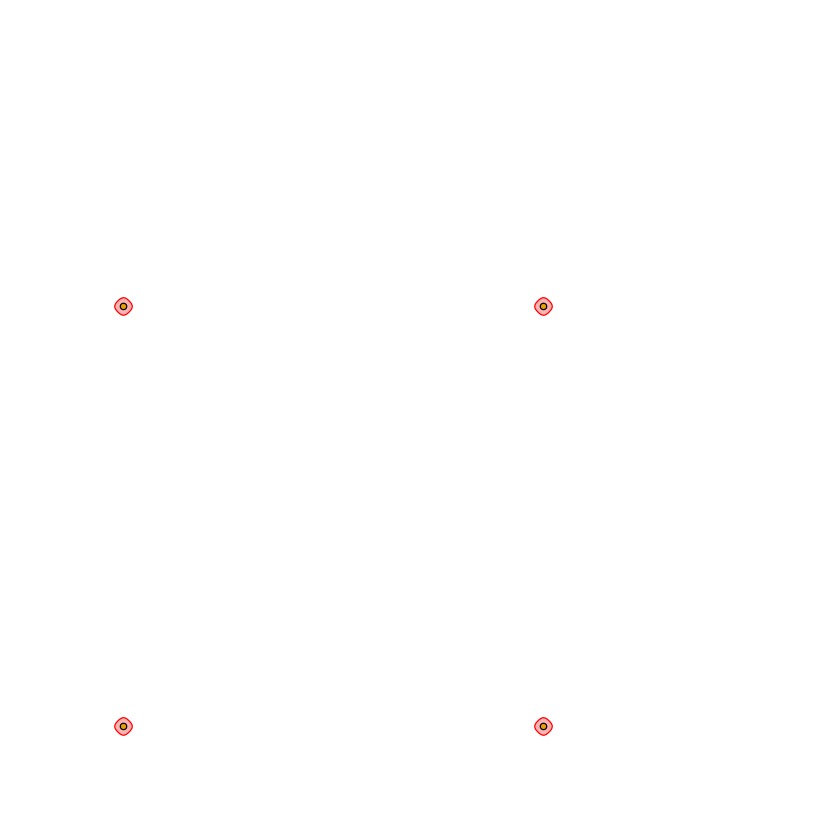

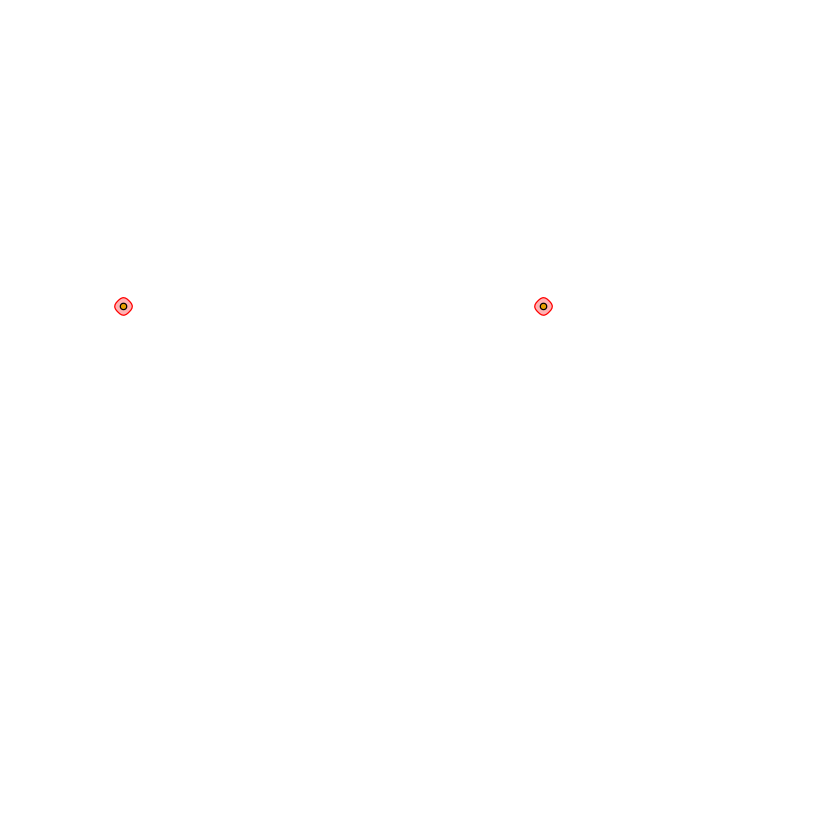

In [ ]:
#It is possible to plot multiple clusters using the plotly package:

par(mfrow=c(2,2))
#par(mar = rep(2, 3))
for(i in 2:length(out)) {
  plot(betweenness_sub[[i]], out[[i]],vertex.size=6,
edge.color="gray80",vertex.label=NA, layout=layout.kamada.kawai)
}

In [ ]:
#get italian reserchers as a subgraph who are in sector 1.
it <- which(V(PRIN_graph)$name %in% Italiancodes_vec) 
# Extract subgraph of italian researchers only
l <- induced.subgraph(graph=PRIN_graph,vids=it)

l3<-asNetwork(l)

l2=get.inducedSubgraph(l3,which(V(l)$Sector %in% c("SECS-S/02","SECS-S/03","SECS-S/04","SECS-S/05")))
l2
l3<-asIgraph(l2)

 Network attributes:
  vertices = 163 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 187 
    missing edges= 0 
    non-missing edges= 187 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

In [ ]:
transitivity(l3)# the transivity opf this subgraph is 36% , meybe is not a good choice to model with this.

[1] 0.3690852

In [ ]:
#ergm

#A null model includes only the edges term.,it  ensures that the simulated networks have the same number of edges
#as the observed network. This can be seen by taking the logistic transformation
#of the edges parameter, which gives the overall density of network. 


#Creating the NULL model and the results of fitting the model are stored 
#in a model object for further examination and analysis.

#A null model includes only the edges term.

k<- ergm(l2~edges) # fit model
summary(k) # look in more depth
k$coef #get all the coef inn the model

# We get a negative edge parameter since the network is rather sparse.
## The edge parameter here is the log of the edge odds, i.e. log(#dyads-w-edge/#dyads-no-edge)



Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   l2 ~ edges

Iterations:  7 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges -4.24283    0.07365      0  -57.61   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 18303  on 13203  degrees of freedom
 Residual Deviance:  1963  on 13202  degrees of freedom
 
AIC: 1965    BIC: 1973    (Smaller is better.) 

edges 
-4.242826

In [ ]:


gden(l2)
plogis(coef(k))  # conditional probability of having a tie is equal to dencuty 

[1] 0.010124

edges 
0.010124

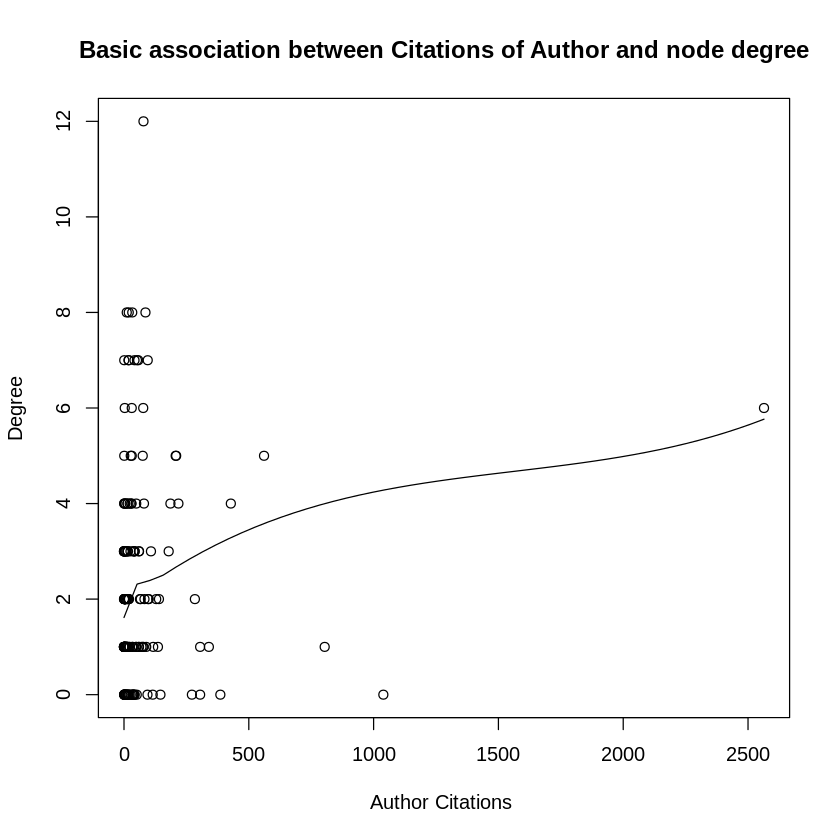

In [ ]:
#Including Node Attributes
#Once a null model is obtained, more interesting models can be fit using a wide
#variety of predictors

scatter.smooth(l2 %v% 'Citations',
degree(l2,gmode='graph'),
xlab='Author Citations ',
ylab='Degree',
main="Basic association between Citations of Author and node degree")
#I am visulizing relation between degree and Citations
#there is no particular relation so I didnt take Citations as a nodal parameter.
#also teh same for References

Warning message:
“`set_attrs()` is deprecated as of rlang 0.3.0
This warning is displayed once per session.”
Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.8044.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.002245.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.




Summary of model fit

Formula:   l2 ~ edges + isolates + nodematch("Sector")

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                 Estimate Std. Error MCMC % z value Pr(>|z|)    
edges             -5.3318     0.1826      0 -29.200  < 1e-04 ***
isolates           0.8125     0.2371      0   3.426 0.000613 ***
nodematch.Sector   2.3329     0.1865      0  12.512  < 1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 18303  on 13203  degrees of freedom
 Residual Deviance:  1726  on 13200  degrees of freedom
 
AIC: 1732    BIC: 1755    (Smaller is better.) 

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                    Mean    SD Naive SE Time-series SE
edges            0.67432 16.23  0.25357         0.4273
isolates         0.04077  6.16  0.09626         0.1423
nodematch.Sector 0.61182 13.99  0.21857         0.3707

2. Quantiles for each variable:

                 2.5% 25% 50% 75% 97.5%
edges             -30 -10   1  12    32
isolates          -13  -4   0   4    11
nodematch.Sector  -26  -9   1  10    28


Sample statistics cross-correlations:
                      edges   isolates nodematch.Sector
edges             1.0000000 -0.7179232        0.9208481
isolates         -0.7179232  1.0000000       -0.6119268
nodematch.Sector  0.9208481 -0.6119268        1.0000000

Sample statistics auto-correlation:
Chain 1 
              edges    isolates nodematch.Sec

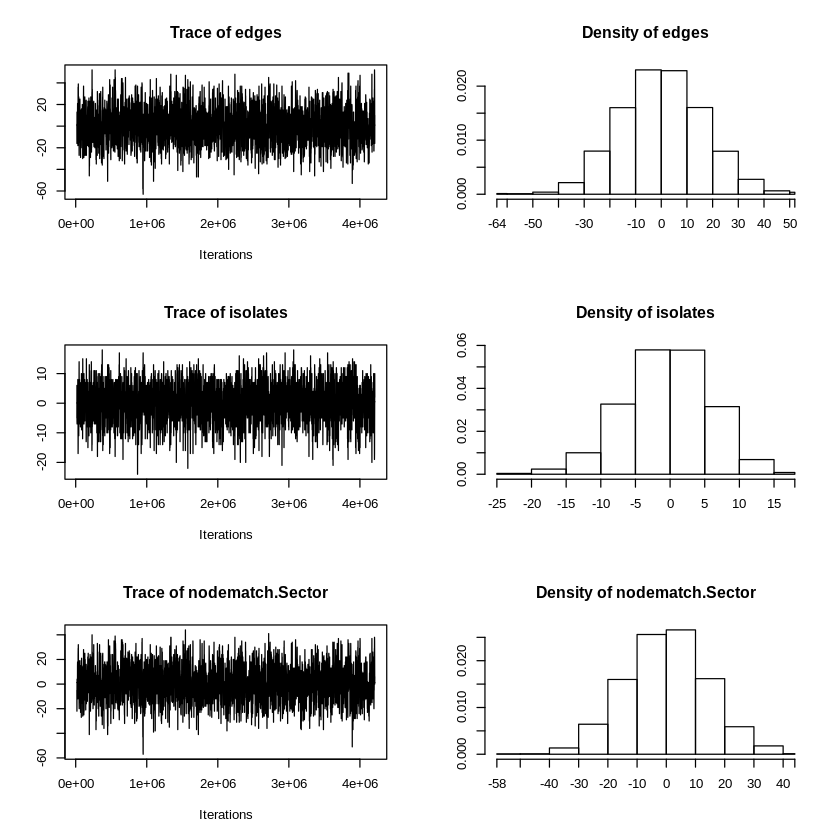

In [ ]:
#Testing node characteristic main effects
#Let's test whether the edge probabilities are a function of Citations:
#we want to see if that athors with a high # of citation are connected together

#there is a good estimation around 60% for isolated node. and also for citation the estime is positive
k3 <- ergm(l2 ~ edges + isolates + nodematch('Sector'))
summary(k3)

mcmc.diagnostics(k3)
#we are aiming for the trace to look like a hairy caterpillar. and 
 #there was a burn-in  the plot.

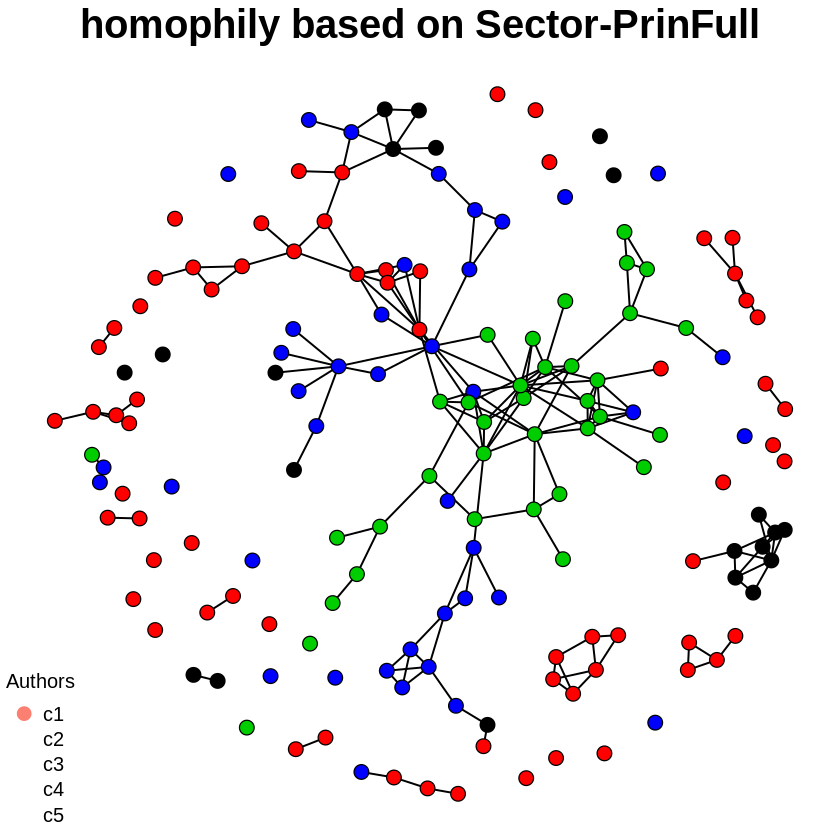

In [ ]:
#lets see that are ties more or less likely between network
#members who are similar to each other on some characteristic (homophily) or not
mesa <- l2
#par(mfrow=c(2,2))
par(mar=c(0,0,2,0))
my_pal <- brewer.pal(11,"Set3")
rolecat <- as.factor(get.vertex.attribute(PRIN_NET,"Sector"))

#plot(mesa,main="Network in sector 1")
#plot(mesa, vertex.col='Citations',main="plot based on Citations")
#legend('bottomleft',fill=7:12,legend=paste('Citations',7:12),cex=0.75)
#plot(mesa, vertex.col='Author.Type',main="plot based on Author.Type")
#plot(mesa, vertex.col='NumDocs',main="plot based on NumDocs")
#plot(mesa, vertex.col='References',main="plot based on References")
plot(mesa, vertex.col='Sector')

title(main="homophily based on Sector-PrinFull",cex.main=2)
legend("bottomleft",legend=c("c1","c2","c3","c4","c5"),
col=my_pal[rolecat],pch=19,pt.cex=1.5,bty="n",
title="Authors")


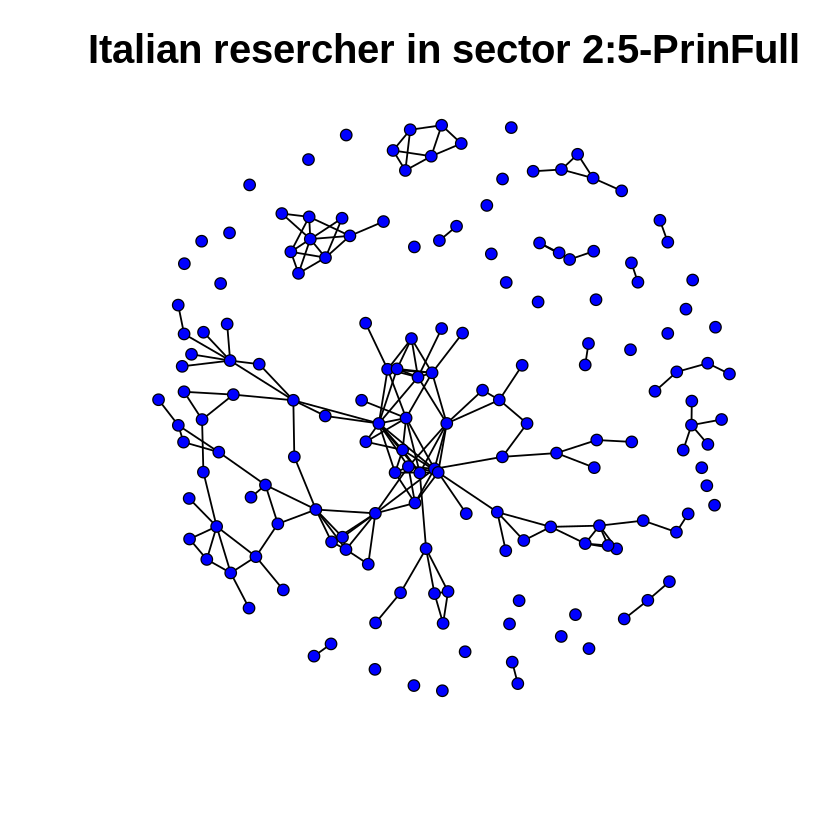

In [ ]:
plot(mesa, vertex.col="blue")
title(main="Italian resercher in sector 2:5-PrinFull",cex.main=2)


In [ ]:
#homophily and heterophily. That is, are ties more or less likely between network
#members who are similar to each other on some characteristic (homophily) or dissimilar (heterophily)
table(l2%v%"Sector")
#The raw frequencies of observed ties between different types of actors
mixingmatrix(l2,'Sector')


SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05 
       21        67        35        40 

Note:  Marginal totals can be misleading
 for undirected mixing matrices.
          SECS-S/02 SECS-S/03 SECS-S/04 SECS-S/05
SECS-S/02        20         3         0         6
SECS-S/03         3        48         3         7
SECS-S/04         0         3        56        16
SECS-S/05         6         7        16        28

In [ ]:
f <- ergm(mesa ~ edges + nodematch('Sector', diff=T) )
summary(f)


Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 





Summary of model fit

Formula:   mesa ~ edges + nodematch("Sector", diff = T)

Iterations:  7 out of 20 

Monte Carlo MLE Results:
                           Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                       -5.5901     0.1693      0 -33.019   <1e-04 ***
nodematch.Sector.SECS-S/02   3.3388     0.2897      0  11.525   <1e-04 ***
nodematch.Sector.SECS-S/03   1.7821     0.2235      0   7.973   <1e-04 ***
nodematch.Sector.SECS-S/04   3.3258     0.2199      0  15.121   <1e-04 ***
nodematch.Sector.SECS-S/05   2.2996     0.2563      0   8.971   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 18303  on 13203  degrees of freedom
 Residual Deviance:  1669  on 13198  degrees of freedom
 
AIC: 1679    BIC: 1716    (Smaller is better.) 

In [ ]:
# SIMULATION

#Once we estimated the model we define a prob. 
#distribution on all possible networks of a given size (= to the observed size). 

# If the model fits the data well we should expect that
# we can draw form this distribution network similar to the observed one (on average)

# For simulation we can use this function

k3.sim <- simulate(k3,nsim=10)
k3.sim 

Number of Networks: 10 
Model: l2 ~ edges + isolates + nodematch("Sector") 
Reference: ~Bernoulli 
Constraints: TNT NULL 163  , 1    , 162  , 2    , 161  , 3    , 160  , 4    , 159  , 5    , 158  , 6    , 157  , 7    , 156  , 8    , 155  , 9    , 154  , 10   , 153  , 11   , 152  , 12   , 151  , 13   , 150  , 14   , 149  , 15   , 148  , 16   , 147  , 17   , 146  , 18   , 145  , 19   , 144  , 20   , 143  , 21   , 142  , 22   , 141  , 23   , 140  , 24   , 139  , 25   , 138  , 26   , 137  , 27   , 136  , 28   , 135  , 29   , 134  , 30   , 133  , 31   , 132  , 32   , 131  , 33   , 130  , 34   , 129  , 35   , 128  , 36   , 127  , 37   , 126  , 38   , 125  , 39   , 124  , 40   , 123  , 41   , 122  , 42   , 121  , 43   , 120  , 44   , 119  , 45   , 118  , 46   , 117  , 47   , 116  , 48   , 115  , 49   , 114  , 50   , 113  , 51   , 112  , 52   , 111  , 53   , 110  , 54   , 109  , 55   , 108  , 56   , 107  , 57   , 106  , 58   , 105  , 59   , 104  , 60   , 103  , 61   , 102  , 62   , 101  , 63  

In [ ]:
class(k3.sim)

#It's a list of objects

length(k3.sim)

[1] "network.list"

[1] 10

In [ ]:


#To get the first object in a list:

k3.sim[[1]]

l2


gden(l2)
gden(k3.sim[[1]])

 Network attributes:
  vertices = 163 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 213 
    missing edges= 0 
    non-missing edges= 213 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

No edge attributes

 Network attributes:
  vertices = 163 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 187 
    missing edges= 0 
    non-missing edges= 187 

 Vertex attribute names: 
    Author Author.Type Citations H.Index NumDocs References Sector vertex.names 

 Edge attribute names: 
    weight 

[1] 0.01416345

[1] 0.0161327

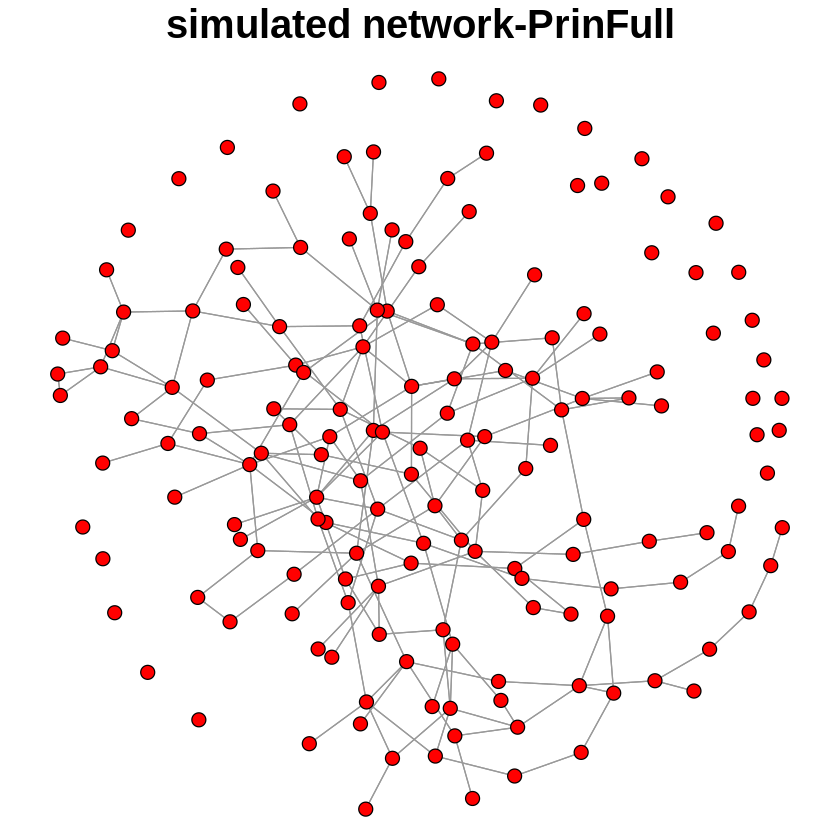

In [ ]:
par(mar=c(0,0,2,0))
gplot(k3.sim[[1]], gmode = "graph",edge.col="gray60",edge.lwd=0.02,
      thresh=0.01,jitter=TRUE)

#Ofc we should expect that differences between
# this drawn network and the observed is given by random fluctuations only
title(main="simulated network-PrinFull",cex.main=2)


Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.7945.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.003973.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



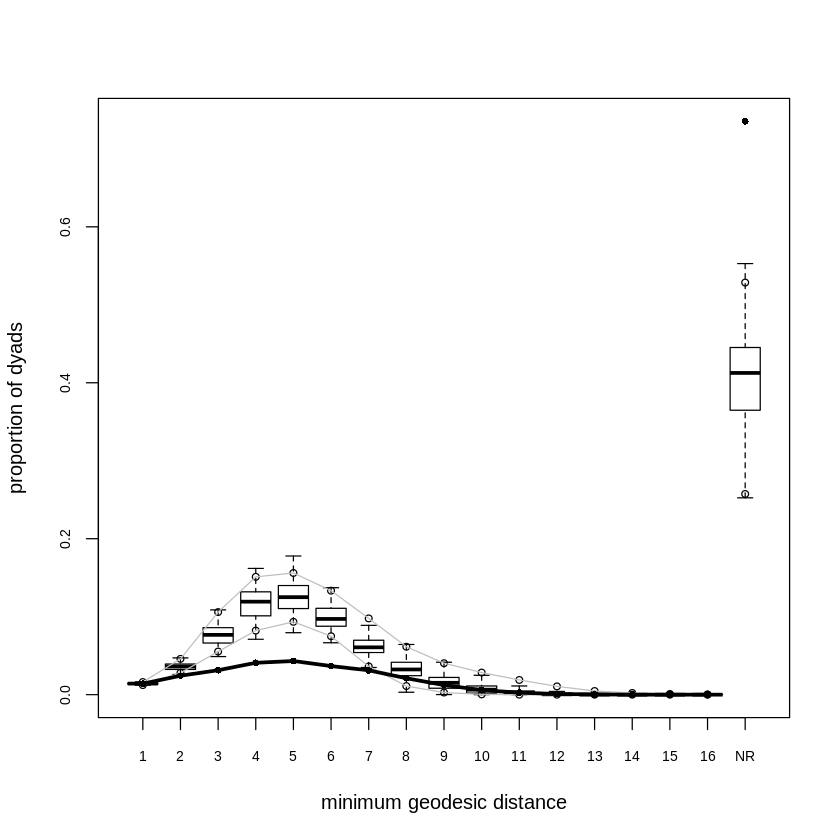

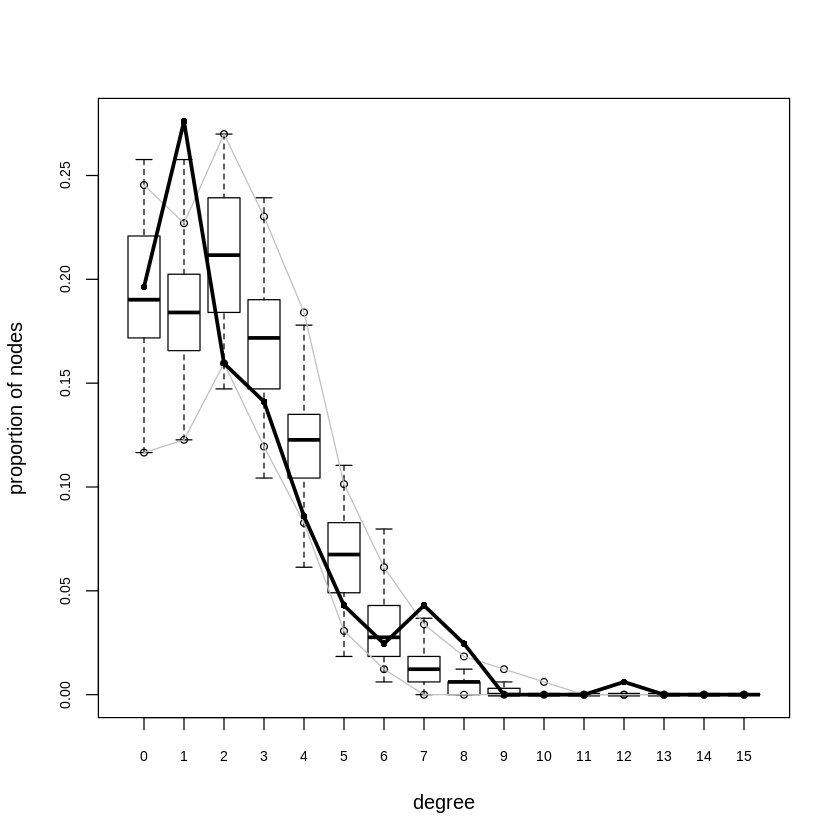

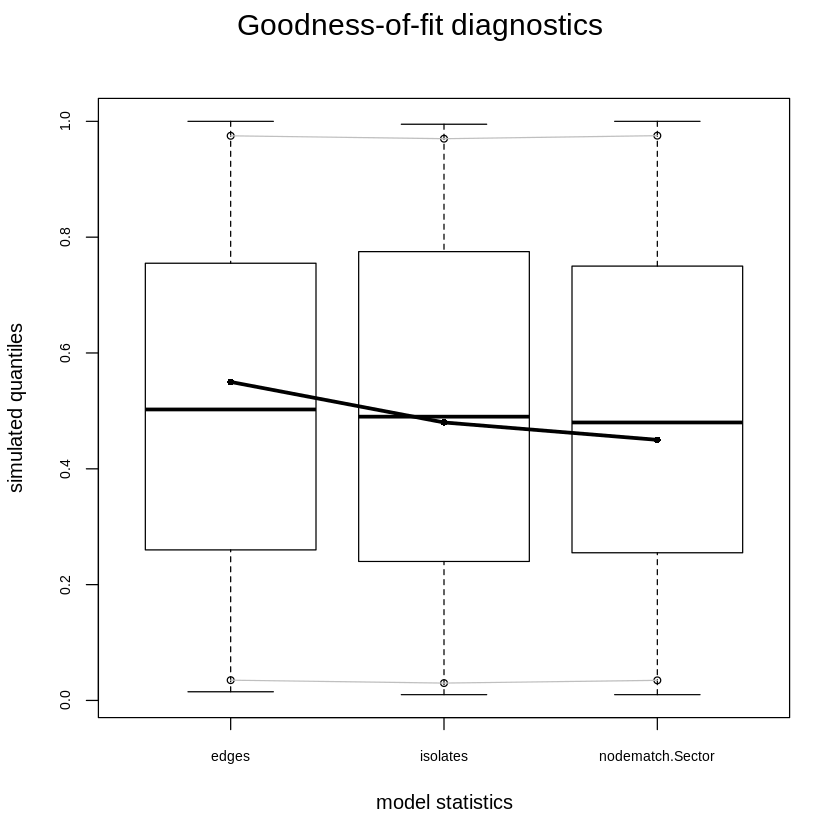

In [ ]:
#Goodness-of-fit for minimum geodesic distance
#Goodness-of-fit for edgewise shared partner
mesamodel.02 <- ergm(mesa~edges + isolates + nodematch('Sector'))
mesamodel.02.gof <- gof(mesamodel.02~distance+degree)
plot(mesamodel.02.gof)
